# Data preprocessing and Data Visualization:

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px  
import plotly.io as pio 
from dython.nominal import associations
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None) 
%matplotlib inline

We combine six years data sets (2016-2021) for crashes occured in Baton Rouge into single data set. 

In [295]:
br_2016 = pd.read_csv('2016-BR.csv')
br_2017 = pd.read_csv('2017-BR.csv')
br_2018 = pd.read_csv('2018-BR.csv')
br_2019 = pd.read_csv('2019-BR.csv')
br_2020 = pd.read_csv('2020-BR.csv')
br_2021 = pd.read_csv('2021-BR.csv') 

In [296]:
br = pd.concat([br_2016, br_2017, br_2018, br_2019, br_2020, br_2021], ignore_index= True)

In [297]:
br.shape

(49336, 54)

In [298]:
br.head()

,parish_cd,city_cd,crash_num,CRASH_DATE,CRASH_TIME,latitude,longitude,ACCESS_CNTL_CD,ALCOHOL,ALIGNMENT_CD,PRI_CONTRIB_FAC_CD,DAY_OF_WK,DRUGS,LIGHTING_CD,NUM_TOT_INJ,NUM_TOT_KIL,NUM_VEH,PRI_ROAD_TYPE,ROAD_COND_CD,ROAD_TYPE_CD,SEVERITY_CD,SURF_COND_CD,SURF_TYPE_CD,WEATHER_CD,HWY_TYPE_CD,PEDESTRIAN,VEH_NUM,DR_AGE,DR_AIRBAG_CD,DR_ALCOHOL_CD,DR_COND_CD,DR_DRUGS_CD,DR_SEX,TRAFF_CNTL_CD,TRAFF_CNTL_COND_CD,VEH_COND_CD,VEH_LIGHTING_CD,Expr1037,VIOLATIONS_CD,VISION_OBSCURE_CD,pavement_type,highway_class,MAN_COLL_CD,ROAD_REL_CD,INTERSECTION,INTERSECTION_NOT,INTER_ROAD_TYPE,EST_SPEED,VEH_MAKE,VEH_MODEL,VEH_YEAR,VEH_TYPE_CD,SHOULDER_TYPE_PRI,SHOULDER_TYPE_OTH
0,17,2,201603231701004273,3/23/16,1/1/01,30.439089,-91.190539,A,False,B,A,WE,False,A,0,0,2,NaN,A,C,E,A,A,B,A,False,1,20,B,NaN,B,NaN,F,R,A,K,B,A,F,N,70,8,J,A,False,True,RD,NaN,MAZDA,6,2003.0,A,5,0
1,17,2,201603221701004223,3/22/16,1/1/01,30.439129,-91.188998,A,False,A,A,TU,False,A,2,0,3,NaN,A,D,D,A,A,A,A,False,1,62,B,NaN,B,NaN,M,V,E,K,A,S,R,N,70,8,B,A,True,False,NaN,NaN,TOYOTA,OTHER,2003.0,S,5,0
2,17,2,201604171701005636,4/17/16,1/1/01,30.439099,-91.190643,C,False,B,A,SU,False,A,1,0,2,NaN,A,A,D,A,A,B,A,False,1,37,B,NaN,A,NaN,F,R,A,K,B,S,D,N,70,8,B,A,False,True,NaN,NaN,MERCURY,MNTR,2005.0,S,5,0
3,17,2,201602241701002716,2/24/16,1/1/01,30.439315,-91.194499,C,False,B,A,WE,False,C,0,0,2,HW,A,A,E,A,A,A,A,False,1,27,B,NaN,B,NaN,M,R,A,K,A,A,D,N,70,8,B,A,False,True,NaN,NaN,TOYOTA,COROLA,2004.0,A,5,0
4,17,2,201603021701003060,3/2/16,1/1/01,30.439089,-91.190460,C,False,A,A,WE,False,A,0,0,2,NaN,A,A,E,A,A,A,A,False,1,22,B,NaN,B,NaN,F,R,A,K,Y,A,D,N,70,8,B,A,False,True,NaN,NaN,MAZDA,MZ3,2012.0,A,5,0


In [299]:
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49336 entries, 0 to 49335
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   parish_cd           49336 non-null  int64  
 1   city_cd             49336 non-null  int64  
 2   crash_num           49336 non-null  object 
 3   CRASH_DATE          49336 non-null  object 
 4   CRASH_TIME          49336 non-null  object 
 5   latitude            49336 non-null  float64
 6   longitude           49336 non-null  float64
 7   ACCESS_CNTL_CD      49335 non-null  object 
 8   ALCOHOL             49336 non-null  bool   
 9   ALIGNMENT_CD        49334 non-null  object 
 10  PRI_CONTRIB_FAC_CD  49334 non-null  object 
 11  DAY_OF_WK           49336 non-null  object 
 12  DRUGS               49336 non-null  bool   
 13  LIGHTING_CD         49335 non-null  object 
 14  NUM_TOT_INJ         49336 non-null  int64  
 15  NUM_TOT_KIL         49336 non-null  int64  
 16  NUM_

In [300]:
br.isnull().sum()

parish_cd                 0
city_cd                   0
crash_num                 0
CRASH_DATE                0
CRASH_TIME                0
latitude                  0
longitude                 0
ACCESS_CNTL_CD            1
ALCOHOL                   0
ALIGNMENT_CD              2
PRI_CONTRIB_FAC_CD        2
DAY_OF_WK                 0
DRUGS                     0
LIGHTING_CD               1
NUM_TOT_INJ               0
NUM_TOT_KIL               0
NUM_VEH                   0
PRI_ROAD_TYPE         14081
ROAD_COND_CD              0
ROAD_TYPE_CD              0
SEVERITY_CD               0
SURF_COND_CD              0
SURF_TYPE_CD              0
WEATHER_CD                0
HWY_TYPE_CD               4
PEDESTRIAN                0
VEH_NUM                   0
DR_AGE                    0
DR_AIRBAG_CD           6588
DR_ALCOHOL_CD         46115
DR_COND_CD              104
DR_DRUGS_CD           46896
DR_SEX                 6726
TRAFF_CNTL_CD            91
TRAFF_CNTL_COND_CD      108
VEH_COND_CD         

In [301]:
br.describe()

,parish_cd,city_cd,latitude,longitude,NUM_TOT_INJ,NUM_TOT_KIL,NUM_VEH,VEH_NUM,DR_AGE,pavement_type,VEH_YEAR,SHOULDER_TYPE_PRI,SHOULDER_TYPE_OTH
count,49336.0,49336.0,49336.000000,49336.000000,49336.000000,49336.000000,49336.000000,49336.0,49336.000000,49336.000000,44798.00000,49336.000000,49336.0
mean,17.0,2.0,30.447541,-91.125472,0.393546,0.003912,2.045727,1.0,58.666106,65.409032,1955.17282,4.414079,0.0
std,0.0,0.0,0.036188,0.048340,0.962107,0.066206,0.486544,0.0,57.937730,5.138294,347.38145,0.633029,0.0
min,17.0,2.0,30.339249,-91.233652,0.000000,0.000000,1.000000,1.0,0.000000,50.000000,0.00000,3.000000,0.0
25%,17.0,2.0,30.423082,-91.166725,0.000000,0.000000,2.000000,1.0,24.000000,60.000000,2005.00000,4.000000,0.0
50%,17.0,2.0,30.439880,-91.135785,0.000000,0.000000,2.000000,1.0,36.000000,70.000000,2010.00000,4.000000,0.0
75%,17.0,2.0,30.461817,-91.090672,0.000000,0.000000,2.000000,1.0,59.000000,70.000000,2015.00000,5.000000,0.0
max,17.0,2.0,30.558933,-90.999398,63.000000,3.000000,9.000000,1.0,200.000000,70.000000,9999.00000,5.000000,0.0


In [302]:
br.columns = br.columns.str.upper()

### Plot helper functions:

In [303]:
def feature_count_for_all_severities(label_dict, x, x_label, hue='SEVERITY_CD', figsize=(16, 8), legend_title='Severity Conditions', log_scale=True):
    
    '''This function takes a dictionary for labels and a categorical feature and 
    plot the the frequency for different classes in that category. It also accepts 
    another categorical feature as hue.'''
    
    font = {'family': 'times'}
    plt.rc('font', **font)

    x_label_dict = br[x].replace(label_dict)

    plt.figure(figsize=figsize)
    ax = sns.countplot(data=br, x=x_label_dict, hue=hue, palette='crest')
    
    plt.xlabel(None)
    plt.ylabel(None)
    plt.title(f'Number of accidents by severity condition', fontsize = 20)

    if hue is not None:
        plt.legend(title=legend_title, fontsize=12, title_fontsize='12')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    if log_scale:
        plt.yscale('log')

    plt.grid(axis='y', linestyle='-', alpha=0.7)
    plt.xticks(rotation=45, horizontalalignment='right')

    for p in ax.patches:
        height = int(p.get_height())
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
        
    for spine in ax.spines.values():
        spine.set_visible(False) 

    plt.tight_layout(pad = 1)

    

def feature_contribution_for_all_severities(label_dict, x, x_label, figsize=(16,8)):
    
    '''This function takes a dictionary for labels and a categorical feature and 
    plot the the percentaage for different classes in that category. '''
    
    font = {'family': 'times'}
    plt.rc('font', **font)

    br[x] = br[x].replace(label_dict)

    severity_A = pd.DataFrame(br[br['SEVERITY_CD'] == 'Fatal'][x].value_counts() * 100 / br[br['SEVERITY_CD'] == 'Fatal'][x].shape[0]).rename(columns={'count': 'Percentage'})
    severity_B = pd.DataFrame(br[br['SEVERITY_CD'] == 'Severe'][x].value_counts() * 100 / br[br['SEVERITY_CD'] == 'Severe'][x].shape[0]).rename(columns={'count': 'Percentage'})
    severity_C = pd.DataFrame(br[br['SEVERITY_CD'] == 'Moderate'][x].value_counts() * 100 / br[br['SEVERITY_CD'] == 'Moderate'][x].shape[0]).rename(columns={'count': 'Percentage'})
    severity_D = pd.DataFrame(br[br['SEVERITY_CD'] == 'Complaint'][x].value_counts() * 100 / br[br['SEVERITY_CD'] == 'Complaint'][x].shape[0]).rename(columns={'count': 'Percentage'})
    severity_E = pd.DataFrame(br[br['SEVERITY_CD'] == 'No injury'][x].value_counts() * 100 / br[br['SEVERITY_CD'] == 'No injury'][x].shape[0]).rename(columns={'count': 'Percentage'})

    severity_A['SEVERITY_CD'] = 'Fatal'
    severity_B['SEVERITY_CD'] = 'Severe'
    severity_C['SEVERITY_CD'] = 'Moderate'
    severity_D['SEVERITY_CD'] = 'Complaint'
    severity_E['SEVERITY_CD'] = 'No injury'

    df = pd.concat([severity_A, severity_B, severity_C, severity_D, severity_E])
    
    df = df.reset_index(drop=False)
    
    pivot_df = df.pivot(index=x, columns='SEVERITY_CD', values='Percentage')
    
    severity_order = ['Fatal', 'Severe', 'Moderate', 'Complaint', 'No injury']
    pivot_df = pivot_df[severity_order]

    sns.set_palette("crest_r")
    plt.figure(figsize=figsize)
    pivot_df.plot(kind='bar', figsize=(16, 8))

    plt.xlabel(x_label, fontsize = 20)
    plt.ylabel('Percentage', fontsize = 20)
    plt.legend(title='Severity Condition', bbox_to_anchor=(1.15, 0.65))
    plt.grid(axis='x')
    plt.xticks(rotation=45, horizontalalignment='right')

    
def feature_contribution_for_particular_severity(label_dict, x, x_label, severity_cd = 'Fatal', figsize=(16,8)):
    
    '''This function takes a dictionary for labels and a categorical feature and 
    plot the the percentaage for particular severity condition.'''
    
    font = {'family': 'times'}
    plt.rc('font', **font)

    br[x] = br[x].replace(label_dict)

    df = pd.DataFrame(br[br['SEVERITY_CD']==severity_cd][x].value_counts()*100/br[br['SEVERITY_CD']==severity_cd][x].shape[0]).rename(columns = {'count': 'Percentage'})
    
    plt.figure(figsize = figsize)
    ax = sns.barplot(x=x, y='Percentage', data=df, palette='crest')
    plt.xlabel(x_label, fontsize = 20)
    plt.ylabel('Percentage', fontsize = 20)
    plt.grid(axis='y', alpha=0.9)
    plt.xticks(rotation=45, horizontalalignment='right')
    for p in ax.patches:
        height = round(p.get_height(), 1)
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    for spine in ax.spines.values():
        spine.set_visible(False) 

    plt.tight_layout(pad = 1)


In [304]:
severity_condition = {'A': 'Fatal', 
                     'B': 'Severe',
                     'C': 'Moderate',
                     'D': 'Complaint',
                     'E': 'No injury'}
br['SEVERITY_CD'].replace(severity_condition, inplace = True)

### Target variable (severity conditions):

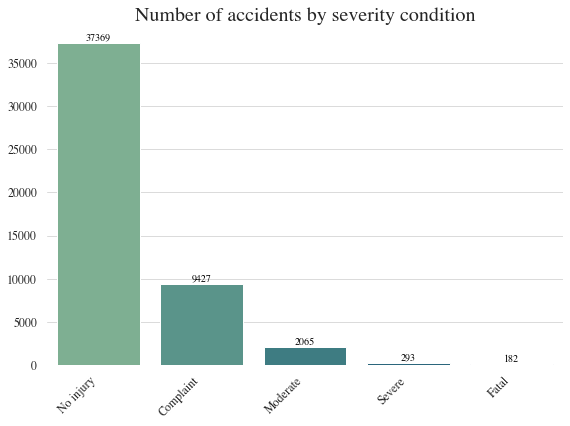

In [305]:
feature_count_for_all_severities({}, 'SEVERITY_CD', 'severity conditions', hue = None, figsize = (8,6), log_scale = False)
plt.savefig('Number of accidents by severity condition.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

 **Note:** From this plot, it's apparent that we're dealing with a multiclass classification task characterized by imbalanced data. To effectively address this challenge, employing data sampling algorithms, cost-sensitive algorithms, or a combination of these approaches becomes crucial to build a robust classifier capable of handling the imbalanced nature of the dataset.

### Locations of fatal accidents:

In [306]:
fig = px.scatter_mapbox(br[(br['SEVERITY_CD']=='Fatal')], lat="LATITUDE", lon="LONGITUDE",
                        zoom=10.6, center=dict(lat=30.45, lon=-91.12),
                        width=1100, height=600)

fig.update_layout(mapbox_style="carto-positron")
fig.update_traces(marker=dict(size=6))  
fig.update_layout(margin={"r":10,"t":10,"l":10,"b":10})
fig.show()
pio.write_html(fig, 'locations of fatal accidents.html')

### Locations of severe cccident:

In [307]:
fig = px.scatter_mapbox(br[br['SEVERITY_CD']=='Severe'], lat="LATITUDE", lon="LONGITUDE",
                        zoom=10.6, center=dict(lat=30.45, lon=-91.12),
                        width=1100, height=600)

fig.update_layout(mapbox_style="carto-positron")
fig.update_traces(marker=dict(size=6))  # Adjust marker size
fig.update_layout(margin={"r":10,"t":10,"l":10,"b":10})
fig.show()
pio.write_html(fig, 'locations of severe accidents.html')

### Time distribution of accidents:

In [308]:
br['CRASH_DATE'] = pd.to_datetime(br['CRASH_DATE'], errors='coerce')
br['YEAR'] = br['CRASH_DATE'].dt.year
br['MONTH'] = br['CRASH_DATE'].dt.month

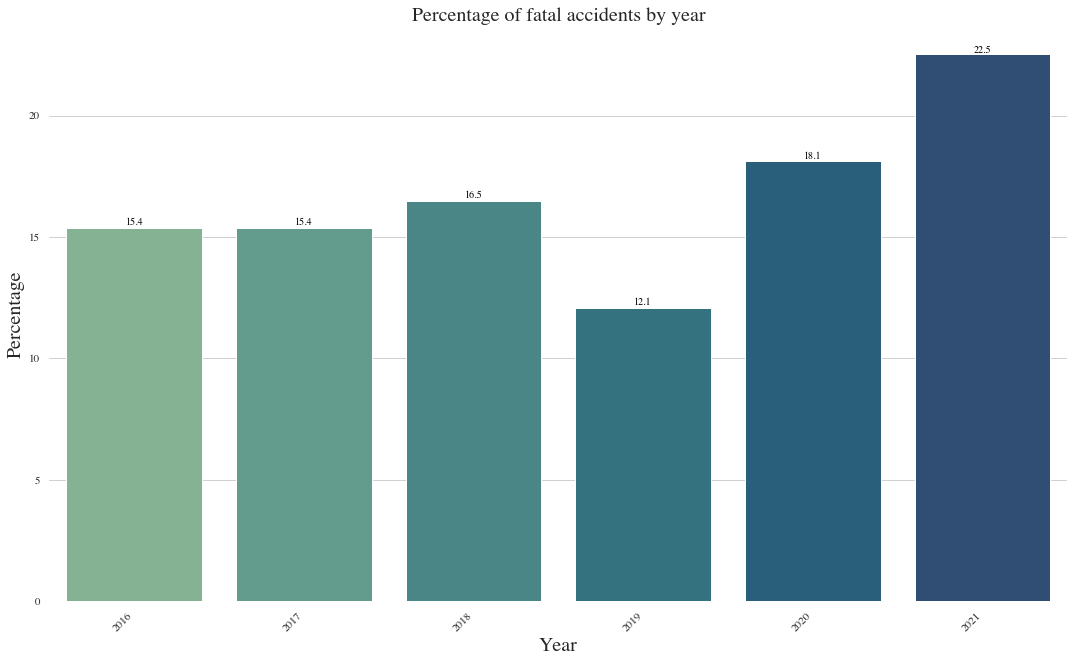

In [309]:
feature_contribution_for_particular_severity({}, 'YEAR', 'Year', 'Fatal', figsize = (15, 9))
plt.title('Percentage of fatal accidents by year', fontsize = 20)
plt.savefig('Percentage of fatal accidents by year.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

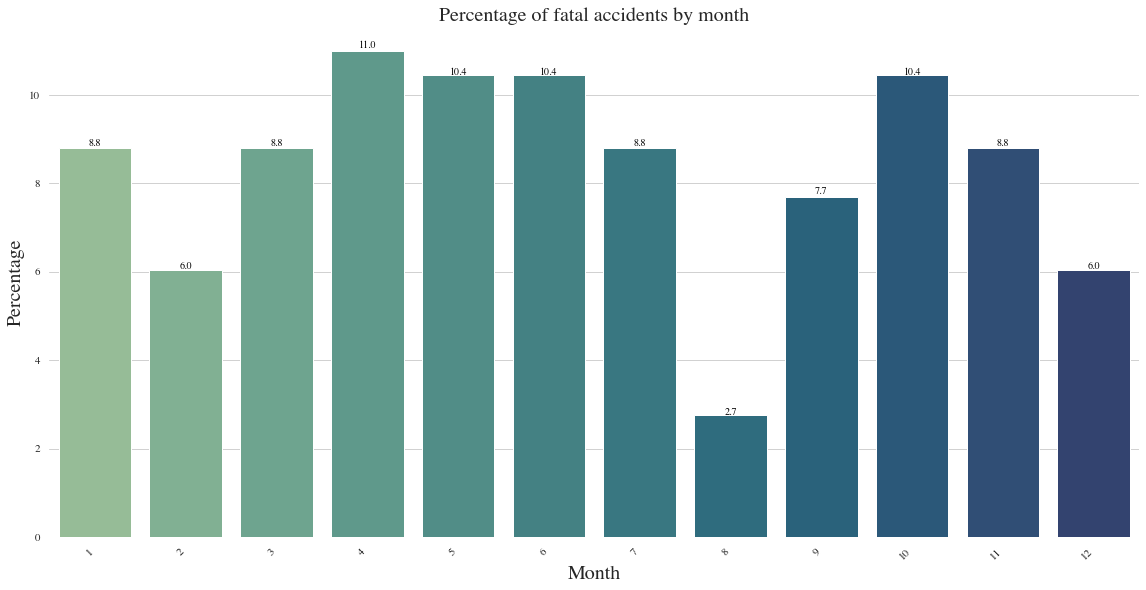

In [310]:
feature_contribution_for_particular_severity({}, 'MONTH', 'Month', severity_cd = 'Fatal', figsize = (16,8))
plt.title('Percentage of fatal accidents by month', fontsize = 20)
plt.savefig('Percentage of fatal sccidents by month.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

**Note:** Based on the plot above, it's evident that there's a higher percentage of fatal accidents occurring in April and May.

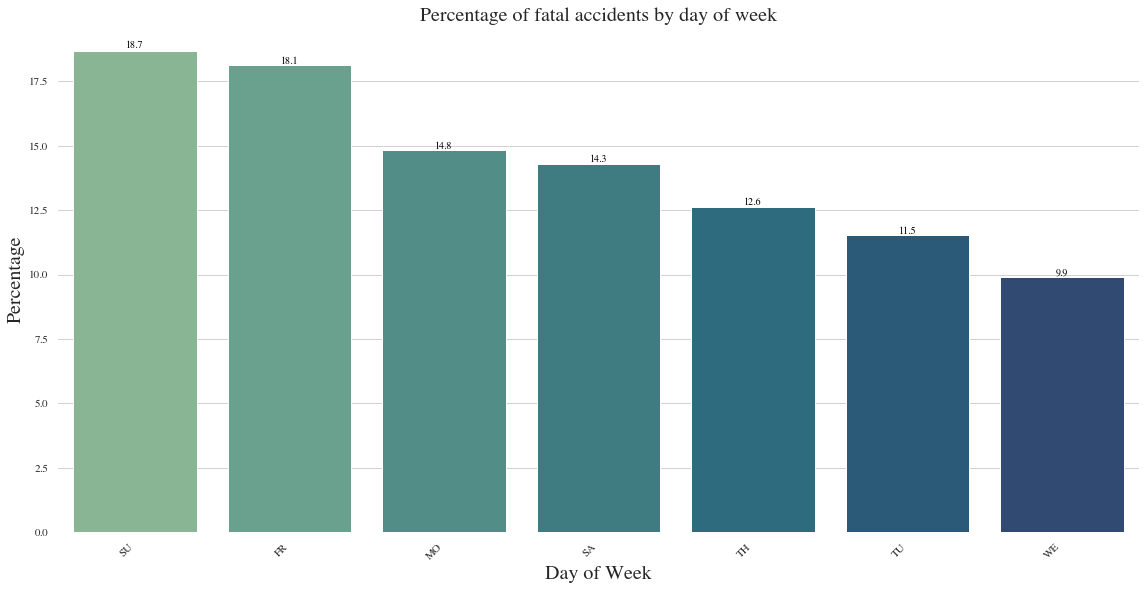

In [311]:
feature_contribution_for_particular_severity({}, 'DAY_OF_WK', 'Day of Week', severity_cd = 'Fatal', figsize = (16, 8))
plt.title('Percentage of fatal accidents by day of week', fontsize = 20)
plt.savefig('Percentage of fatal sccidents by day of week.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

**Note:** Based on the plot above, it's evident that there's a higher percentage of fatal accidents occurring in Sunday. 

### Independent variables:

Here we classify independent variables and describe its relation to the target variable (severity condition).

### Road variables:

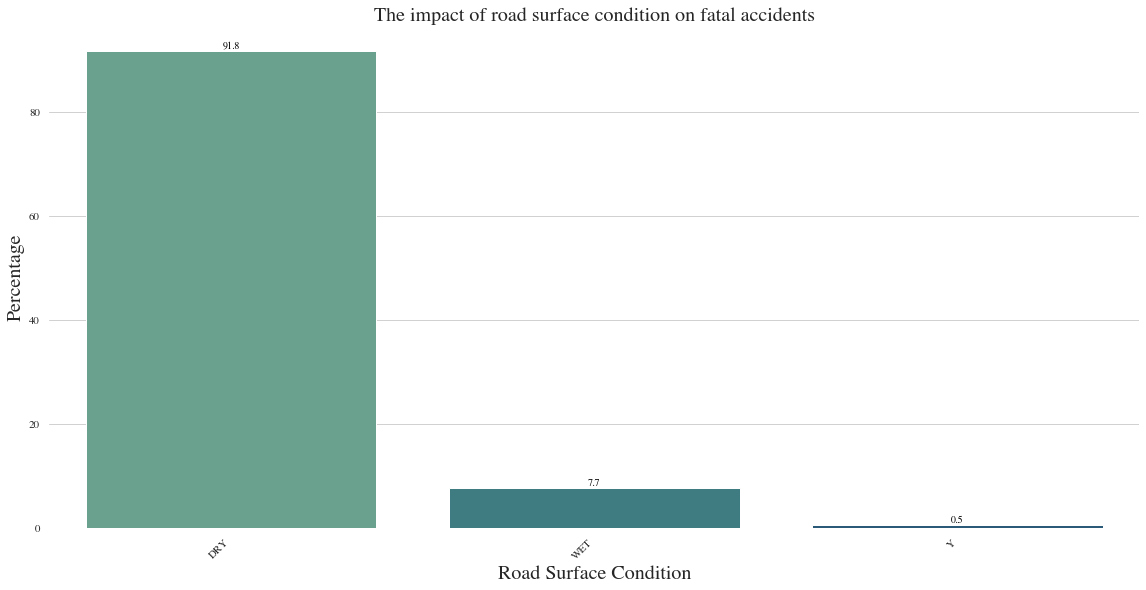

In [312]:
surface_condition = {
    'A': 'DRY',
    'B': 'WET',
    'C': 'SNOW/SLUSH',
    'D': 'ICE',
    'E': 'CONTAMINANT',
    'F': 'UNKNOWN',
    'G': 'OTHER'
}

feature_contribution_for_particular_severity(surface_condition, 'SURF_COND_CD', 'Road Surface Condition')
plt.title('The impact of road surface condition on fatal accidents', fontsize = 20)
plt.savefig('The impact of road surface condition on fatal accidents.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

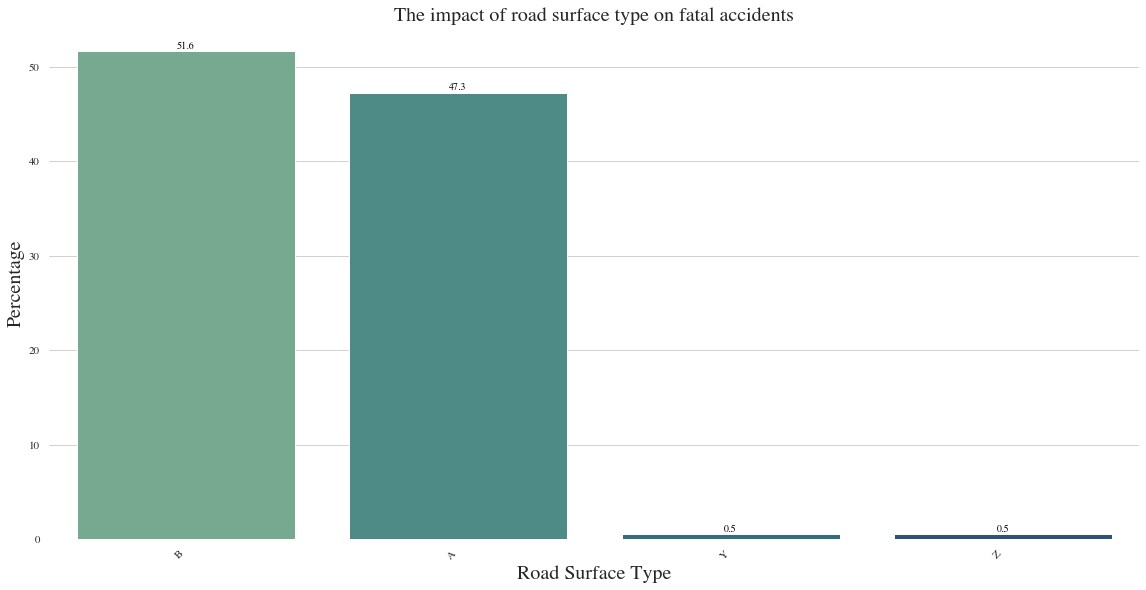

In [313]:
surface_type = {
    'H': 'CONCRETE',
    'I': 'BLACK TOP',
    'J': 'BRICK',
    'K': 'GRAVEL',
    'L': 'DIRT',
    'M': 'UNKNOWN',
    'N': 'OTHER'
}

feature_contribution_for_particular_severity(surface_type, 'SURF_TYPE_CD', 'Road Surface Type', 'Fatal' )
plt.title('The impact of road surface type on fatal accidents', fontsize = 20)
plt.savefig('The impact of road surface type on fatal accidents.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

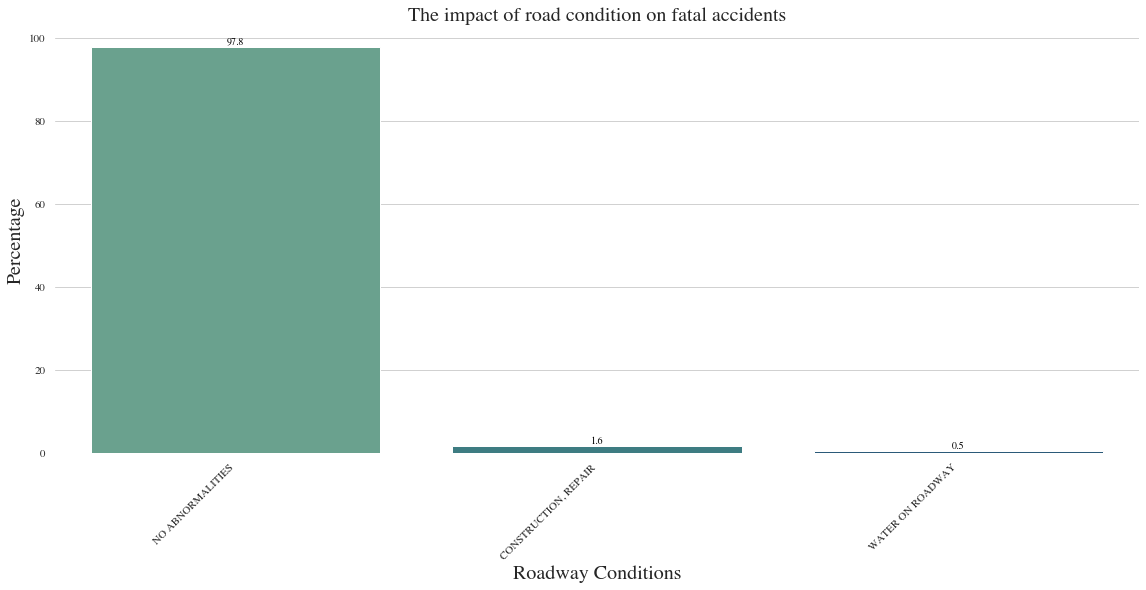

In [314]:
road_condition = {
    'A': 'NO ABNORMALITIES',
    'B': 'SHOULDER ABNORMALITY',
    'C': 'HOLES',
    'D': 'DEEP RUTS',
    'E': 'BUMPS',
    'F': 'LOOSE SURFACE MATERIAL',
    'G': 'CONSTRUCTION, REPAIR',
    'H': 'OVERHEAD CLEARANCE LIMITED',
    'I': 'CONSTRUCTION - NO WARNING',
    'J': 'PREVIOUS CRASH',
    'K': 'WATER ON ROADWAY',
    'L': 'ANIMAL IN ROADWAY',
    'M': 'OBJECT IN ROADWAY',
    'Z': 'OTHER'
}
feature_contribution_for_particular_severity(road_condition, 'ROAD_COND_CD', 'Roadway Conditions' , 'Fatal')
plt.title('The impact of road condition on fatal accidents', fontsize = 20)
plt.savefig('The impact of road condition on fatal accidents.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

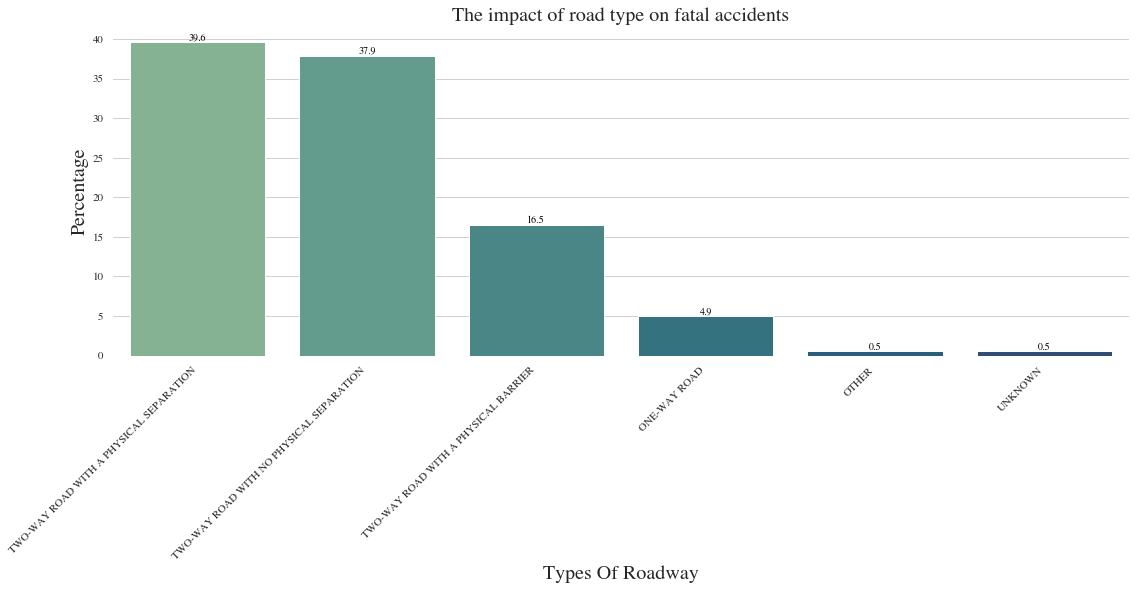

In [315]:
road_type = {
    'A': 'ONE-WAY ROAD',
    'B': 'TWO-WAY ROAD WITH NO PHYSICAL SEPARATION',
    'C': 'TWO-WAY ROAD WITH A PHYSICAL SEPARATION',
    'D': 'TWO-WAY ROAD WITH A PHYSICAL BARRIER',
    'Y': 'UNKNOWN',
    'Z': 'OTHER'
}
feature_contribution_for_particular_severity(road_type, 'ROAD_TYPE_CD', 'Types Of Roadway' , 'Fatal')
plt.title('The impact of road type on fatal accidents', fontsize = 20)
plt.savefig('The impact of road type on fatal accidents.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

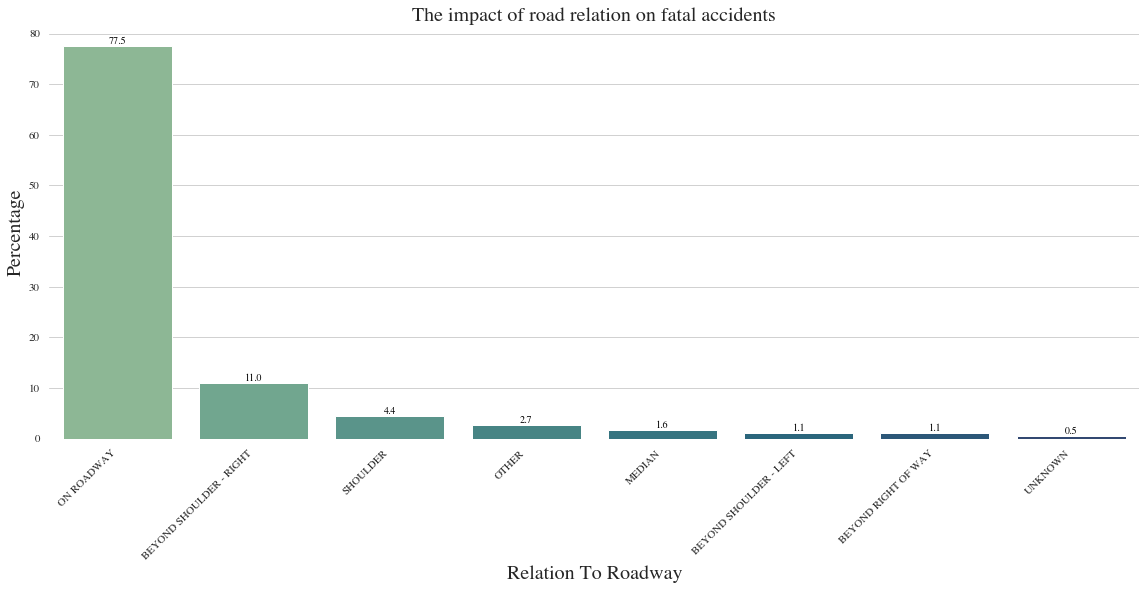

In [316]:
road_relation = {
    'A': 'ON ROADWAY',
    'B': 'SHOULDER',
    'C': 'MEDIAN',
    'D': 'BEYOND SHOULDER - LEFT',
    'E': 'BEYOND SHOULDER - RIGHT',
    'F': 'BEYOND RIGHT OF WAY',
    'G': 'GORE',
    'Y': 'UNKNOWN',
    'Z': 'OTHER'
}
feature_contribution_for_particular_severity(road_relation, 'ROAD_REL_CD', 'Relation To Roadway', 'Fatal')
plt.title('The impact of road relation on fatal accidents', fontsize = 20)
plt.savefig('The impact of road relation on fatal accidents.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

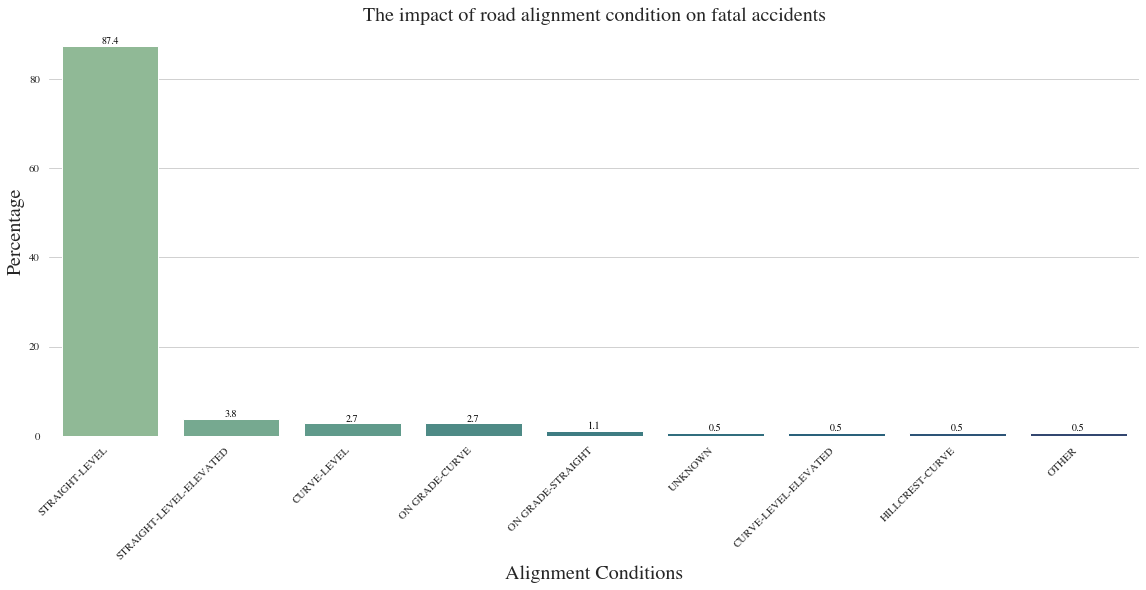

In [317]:
alignment_condition = {
    'A': 'STRAIGHT-LEVEL',
    'B': 'STRAIGHT-LEVEL-ELEVATED',
    'C': 'CURVE-LEVEL',
    'D': 'CURVE-LEVEL-ELEVATED',
    'E': 'ON GRADE-STRAIGHT',
    'F': 'ON GRADE-CURVE',
    'G': 'HILLCREST-STRAIGHT',
    'H': 'HILLCREST-CURVE',
    'I': 'DIP, HUMP-STRAIGHT',
    'J': 'DIP, HUMP-CURVE',
    'Y': 'UNKNOWN',
    'Z': 'OTHER'
}
feature_contribution_for_particular_severity(alignment_condition, 'ALIGNMENT_CD', 'Alignment Conditions', 'Fatal' )
plt.title('The impact of road alignment condition on fatal accidents', fontsize = 20)
plt.savefig('The impact of road alighnment condition on fatal accidents.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

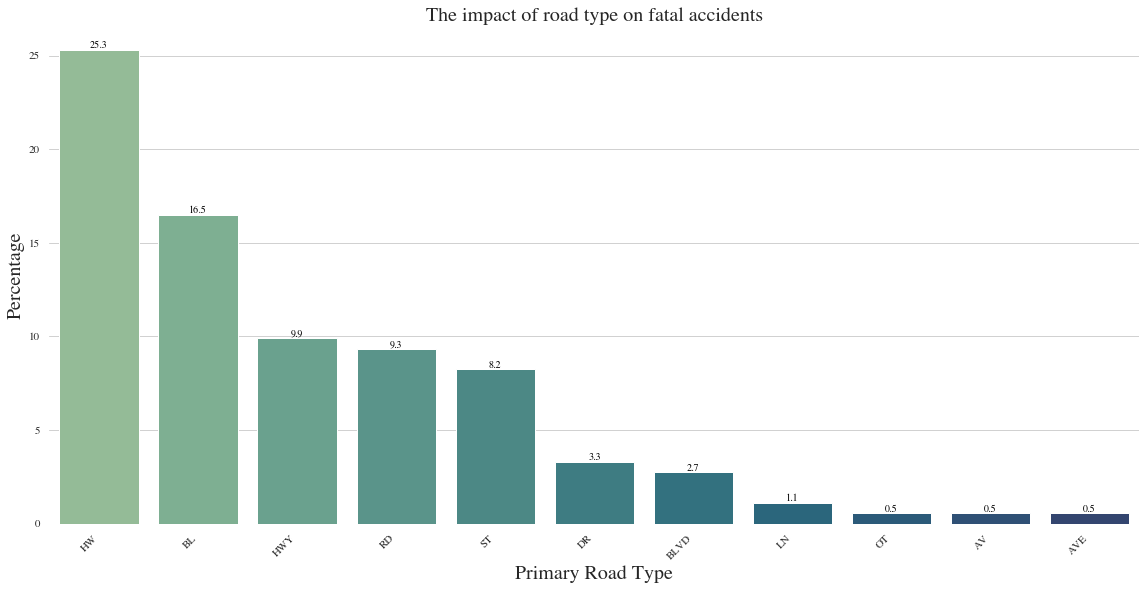

In [318]:
primary_road_type = {}
feature_contribution_for_particular_severity(primary_road_type, 'PRI_ROAD_TYPE', 'Primary Road Type', 'Fatal')
plt.title('The impact of road type on fatal accidents', fontsize = 20)
plt.savefig('The impact of road type on fatal accidents.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

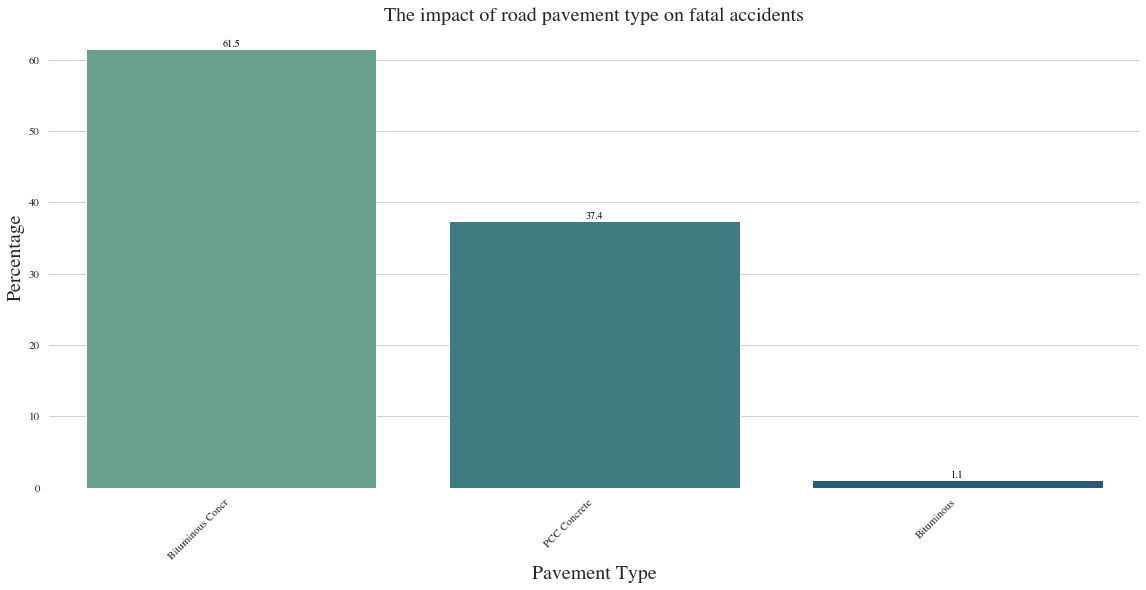

In [319]:
pavement_type = {
    20: 'Unimproved',
    30: 'Graded',
    40: 'Gravel',
    50: 'Bituminous',
    60: 'Bituminous Concr',
    70: 'PCC Concrete',
    80: 'Brick'
}

feature_contribution_for_particular_severity(pavement_type, 'PAVEMENT_TYPE', 'Pavement Type', 'Fatal')
plt.title('The impact of road pavement type on fatal accidents', fontsize = 20)
plt.savefig('The impact of road pavement type on fatal accidents.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

<Figure size 1152x576 with 0 Axes>

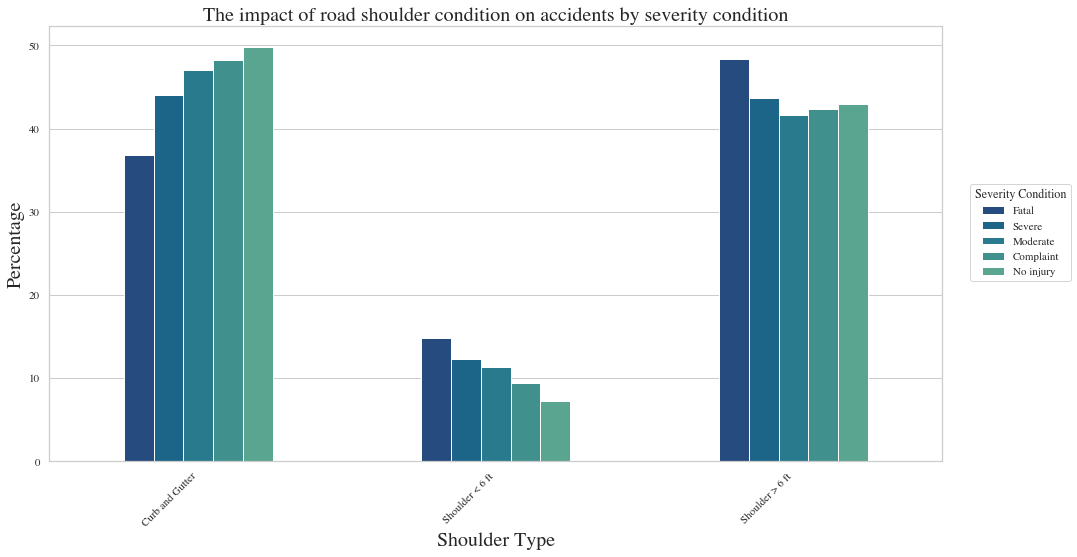

In [320]:
shoulder_condition = {
    0: 'Unknown',
    1: 'Shoulder (unknown)',
    2: 'None',
    3: 'Shoulder < 6 ft',
    4: 'Shoulder > 6 ft',
    5: 'Curb and Gutter'
}
feature_contribution_for_all_severities(shoulder_condition, 'SHOULDER_TYPE_PRI', 'Shoulder Type')
plt.title('The impact of road shoulder condition on accidents by severity condition', fontsize = 20)
plt.savefig('The impact of road shoulder condition on accidents by severity condition.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

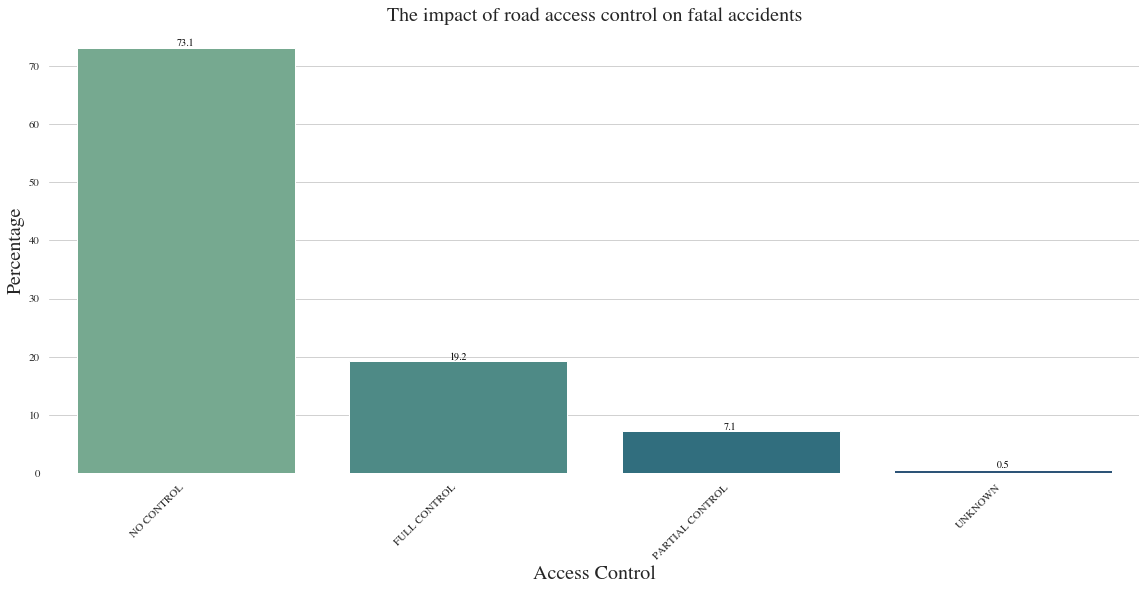

In [321]:
access_control = {
    'A': 'NO CONTROL',
    'B': 'PARTIAL CONTROL',
    'C': 'FULL CONTROL',
    'Y': 'UNKNOWN',
    'Z': 'OTHER'
}

feature_contribution_for_particular_severity(access_control, 'ACCESS_CNTL_CD', 'Access Control', 'Fatal')
plt.title('The impact of road access control on fatal accidents', fontsize = 20)
plt.savefig('The impact of road access control on fatal accidents.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

<Figure size 1152x576 with 0 Axes>

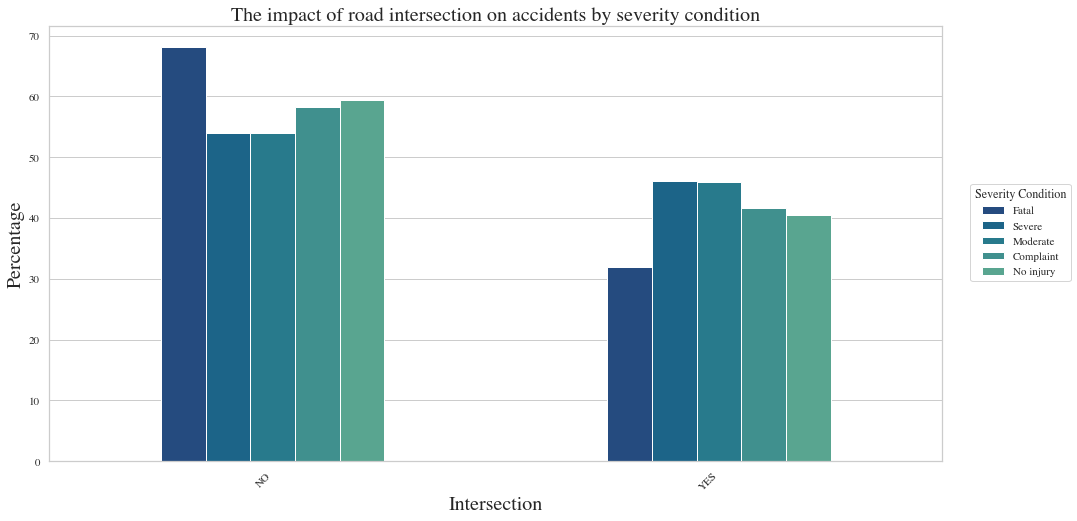

In [322]:
intersection = {False: 'NO', True: 'YES'}
feature_contribution_for_all_severities(intersection, 'INTERSECTION', 'Intersection', (16, 8))
plt.title('The impact of road intersection on accidents by severity condition', fontsize = 20)
plt.savefig('The impact of road intersection on accidents by severity condition.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

### Vehicle variables

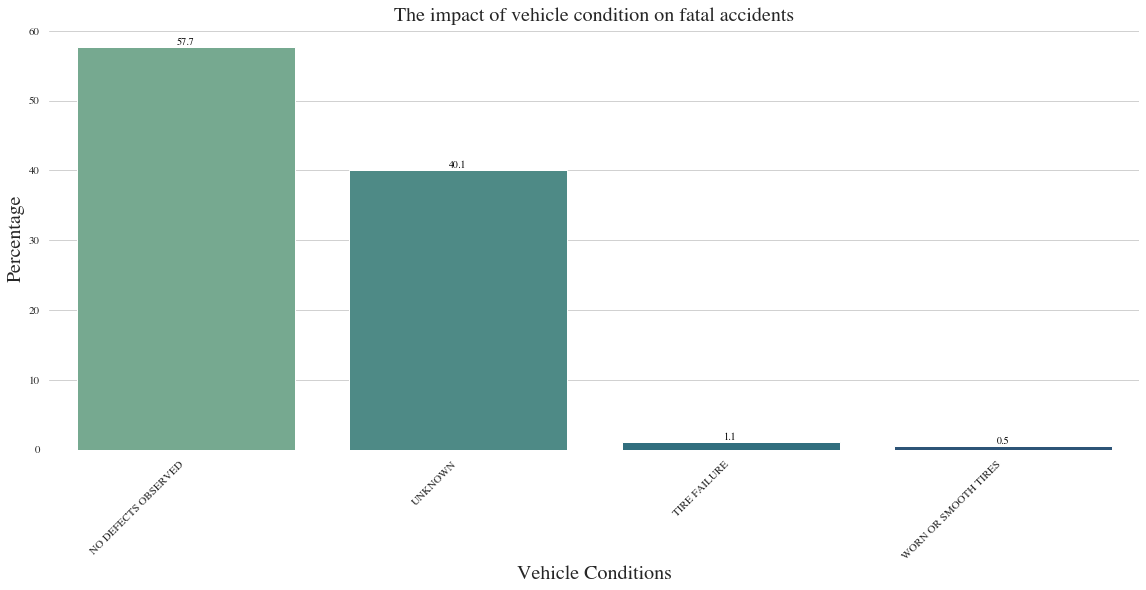

In [323]:
vehicle_condition = {
    'A': 'DEFECTIVE BRAKES',
    'B': 'DEFECTIVE HEADLIGHTS',
    'C': 'DEFECTIVE REAR LIGHTS',
    'D': 'DEFECTIVE SIGNAL LIGHTS',
    'E': 'ALL LIGHTS OUT',
    'F': 'DEFECTIVE STEERING',
    'G': 'TIRE FAILURE',
    'H': 'WORN OR SMOOTH TIRES',
    'I': 'ENGINE FAILURE',
    'J': 'DEFECTIVE SUSPENSION',
    'K': 'NO DEFECTS OBSERVED',
    'Y': 'UNKNOWN',
    'Z': 'OTHER'
}

feature_contribution_for_particular_severity(vehicle_condition, 'VEH_COND_CD', 'Vehicle Conditions', 'Fatal')
plt.title('The impact of vehicle condition on fatal accidents', fontsize = 20)
plt.savefig('The impact of vehicle condition on fatal accidents.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

<Figure size 1152x576 with 0 Axes>

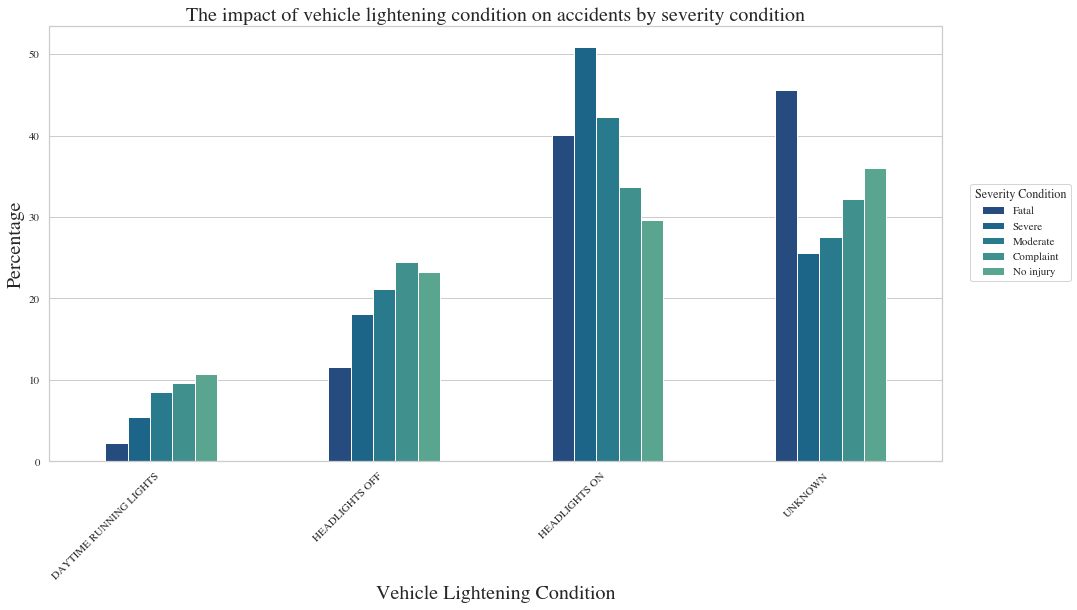

In [324]:
vehicle_lightening_condition = {
    'A': 'HEADLIGHTS ON',
    'B': 'HEADLIGHTS OFF',
    'C': 'DAYTIME RUNNING LIGHTS',
    'Y': 'UNKNOWN'
}
feature_contribution_for_all_severities(vehicle_lightening_condition, 'VEH_LIGHTING_CD', 'Vehicle Lightening Condition')
plt.title('The impact of vehicle lightening condition on accidents by severity condition', fontsize = 20)
plt.savefig('The impact of vehicle lightening condition on accidents by severity condition.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

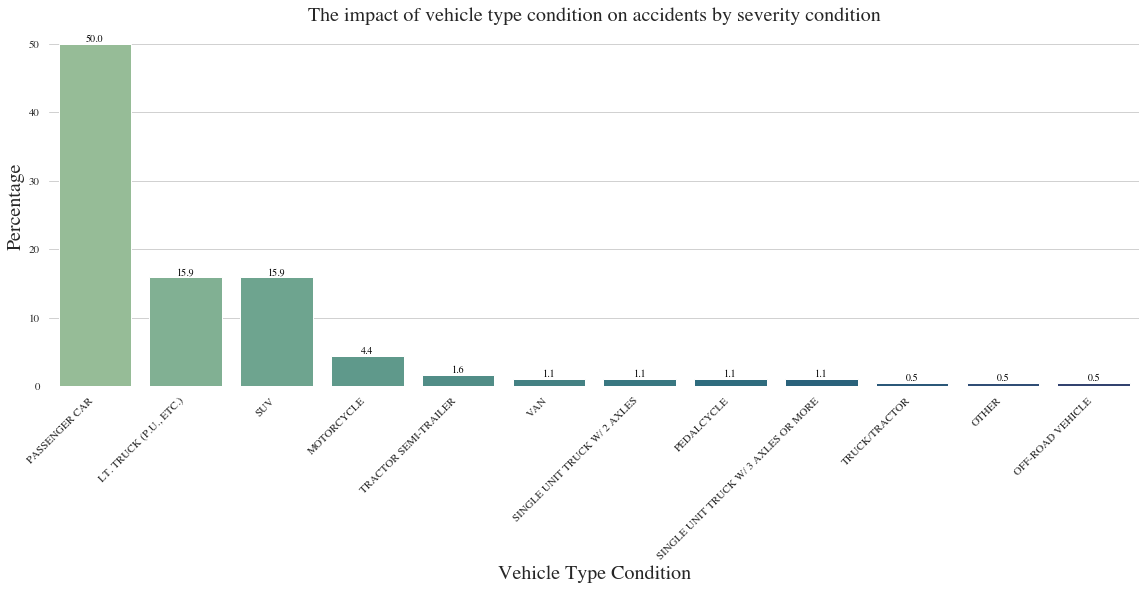

In [325]:
vehicle_type_condition = {
    'A': 'PASSENGER CAR',
    'B': 'LT. TRUCK (P.U., ETC.)',
    'C': 'VAN',
    'D': 'A, B, C, OR S WITH TRAILER',
    'E': 'MOTORCYCLE',
    'F': 'PEDALCYCLE',
    'G': 'OFF-ROAD VEHICLE',
    'H': 'EMERGENCY VEHICLE IN USE',
    'I': 'SCHOOL BUS',
    'J': 'BUS W/ SEATS FOR 9-15 OCCUPANTS',
    'K': 'BUS W/ SEATS FOR 16 OR MORE OCC.',
    'L': 'SINGLE UNIT TRUCK W/ 2 AXLES',
    'M': 'SINGLE UNIT TRUCK W/ 3 AXLES OR MORE',
    'N': 'TRUCK/TRAILER',
    'P': 'TRUCK/TRACTOR',
    'Q': 'TRACTOR SEMI-TRAILER',
    'R': 'TRUCK DOUBLE',
    'S': 'SUV',
    'T': 'FARM EQUIPMENT',
    'V': 'MOTOR HOME',
    'Z': 'OTHER'
}
feature_contribution_for_particular_severity(vehicle_type_condition, 'VEH_TYPE_CD', 'Vehicle Type Condition', 'Fatal')
plt.title('The impact of vehicle type condition on accidents by severity condition', fontsize = 20)
plt.savefig('The impact of vehicle condition on accidents by severity condition.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

In [326]:
br['CAR_AGE'] = br['YEAR'] - br['VEH_YEAR']

In [327]:
br['CAR_AGE'] = br['CAR_AGE'].apply(lambda x: np.nan if x<0 or x>20 else x)

In [328]:
br[br['CAR_AGE']<0]

,PARISH_CD,CITY_CD,CRASH_NUM,CRASH_DATE,CRASH_TIME,LATITUDE,LONGITUDE,ACCESS_CNTL_CD,ALCOHOL,ALIGNMENT_CD,PRI_CONTRIB_FAC_CD,DAY_OF_WK,DRUGS,LIGHTING_CD,NUM_TOT_INJ,NUM_TOT_KIL,NUM_VEH,PRI_ROAD_TYPE,ROAD_COND_CD,ROAD_TYPE_CD,SEVERITY_CD,SURF_COND_CD,SURF_TYPE_CD,WEATHER_CD,HWY_TYPE_CD,PEDESTRIAN,VEH_NUM,DR_AGE,DR_AIRBAG_CD,DR_ALCOHOL_CD,DR_COND_CD,DR_DRUGS_CD,DR_SEX,TRAFF_CNTL_CD,TRAFF_CNTL_COND_CD,VEH_COND_CD,VEH_LIGHTING_CD,EXPR1037,VIOLATIONS_CD,VISION_OBSCURE_CD,PAVEMENT_TYPE,HIGHWAY_CLASS,MAN_COLL_CD,ROAD_REL_CD,INTERSECTION,INTERSECTION_NOT,INTER_ROAD_TYPE,EST_SPEED,VEH_MAKE,VEH_MODEL,VEH_YEAR,VEH_TYPE_CD,SHOULDER_TYPE_PRI,SHOULDER_TYPE_OTH,YEAR,MONTH,CAR_AGE


In [329]:
br[br['CAR_AGE']>20]

,PARISH_CD,CITY_CD,CRASH_NUM,CRASH_DATE,CRASH_TIME,LATITUDE,LONGITUDE,ACCESS_CNTL_CD,ALCOHOL,ALIGNMENT_CD,PRI_CONTRIB_FAC_CD,DAY_OF_WK,DRUGS,LIGHTING_CD,NUM_TOT_INJ,NUM_TOT_KIL,NUM_VEH,PRI_ROAD_TYPE,ROAD_COND_CD,ROAD_TYPE_CD,SEVERITY_CD,SURF_COND_CD,SURF_TYPE_CD,WEATHER_CD,HWY_TYPE_CD,PEDESTRIAN,VEH_NUM,DR_AGE,DR_AIRBAG_CD,DR_ALCOHOL_CD,DR_COND_CD,DR_DRUGS_CD,DR_SEX,TRAFF_CNTL_CD,TRAFF_CNTL_COND_CD,VEH_COND_CD,VEH_LIGHTING_CD,EXPR1037,VIOLATIONS_CD,VISION_OBSCURE_CD,PAVEMENT_TYPE,HIGHWAY_CLASS,MAN_COLL_CD,ROAD_REL_CD,INTERSECTION,INTERSECTION_NOT,INTER_ROAD_TYPE,EST_SPEED,VEH_MAKE,VEH_MODEL,VEH_YEAR,VEH_TYPE_CD,SHOULDER_TYPE_PRI,SHOULDER_TYPE_OTH,YEAR,MONTH,CAR_AGE


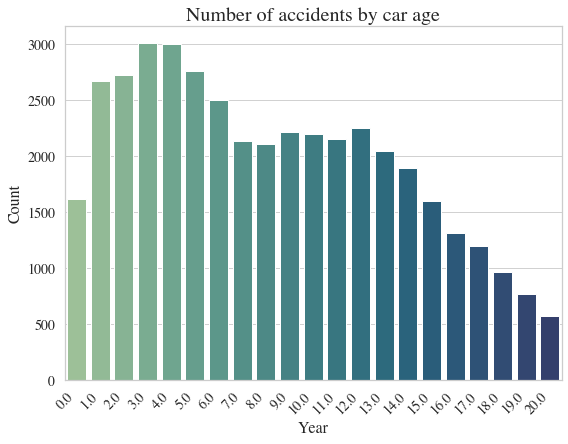

In [330]:
font = {'family': 'times'}
plt.rc('font', **font)
plt.figure(figsize=(8, 6))
sns.countplot(data=br, x=br['CAR_AGE'], palette='crest')  
plt.xlabel('Year', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', alpha=0.9)
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.title('Number of accidents by car age', fontsize = 20)
plt.savefig('Number of accidents by car age.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

In [331]:
severity_car_age = br.groupby(['CAR_AGE']).count()['SEVERITY_CD']

In [332]:
fatal_car_age = br[br['SEVERITY_CD']=='Fatal'].groupby(['CAR_AGE']).count()['SEVERITY_CD']
fatal_percent = (fatal_car_age/severity_car_age)*100

In [333]:
severe_car_age = br[br['SEVERITY_CD']=='Severe'].groupby(['CAR_AGE']).count()['SEVERITY_CD']
severe_percent = (severe_car_age/severity_car_age)*100

In [334]:
moderate_car_age = br[br['SEVERITY_CD']=='Moderate'].groupby(['CAR_AGE']).count()['SEVERITY_CD']
moderate_percent = (moderate_car_age/severity_car_age)*100

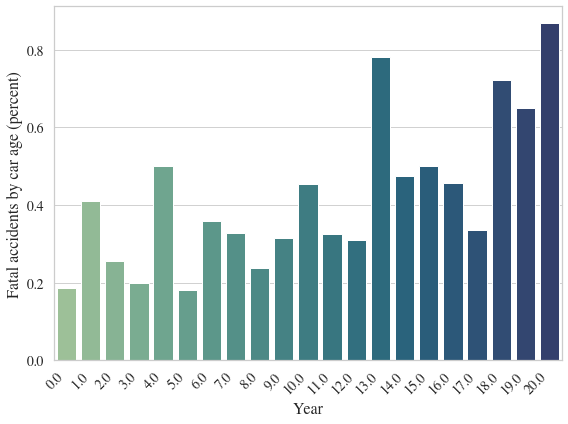

In [335]:
font = {'family': 'times'}
plt.rc('font', **font)
plt.figure(figsize=(8, 6)) 
sns.barplot(fatal_percent, palette='crest')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Fatal accidents by car age (percent)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', alpha=0.9)
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.savefig('Fatal accidents by car age.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

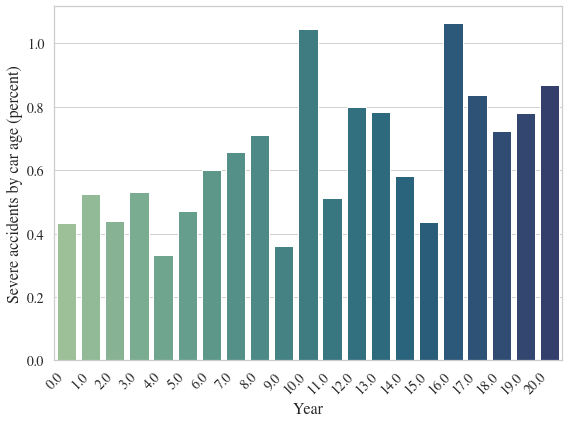

In [336]:
font = {'family': 'times'}
plt.rc('font', **font)
plt.figure(figsize=(8, 6)) 
sns.barplot(severe_percent, palette='crest')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Severe accidents by car age (percent)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', alpha=0.9)
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.savefig('Severe accidents by car age.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

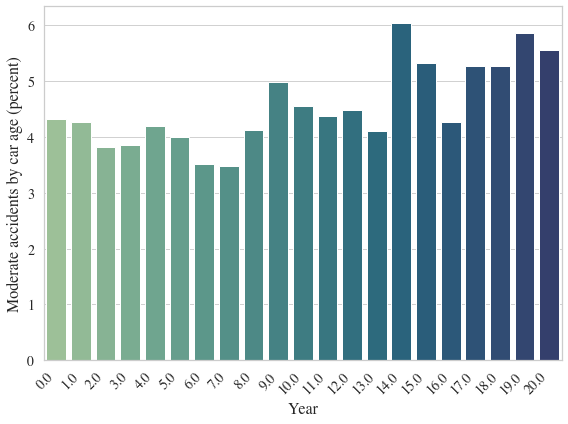

In [337]:
font = {'family': 'times'}
plt.rc('font', **font)
plt.figure(figsize=(8, 6)) 
sns.barplot(moderate_percent, palette='crest')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Moderate accidents by car age (percent)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', alpha=0.9)
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.savefig('Moderate accidents by car age.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

### Driver variables:

<Figure size 1152x576 with 0 Axes>

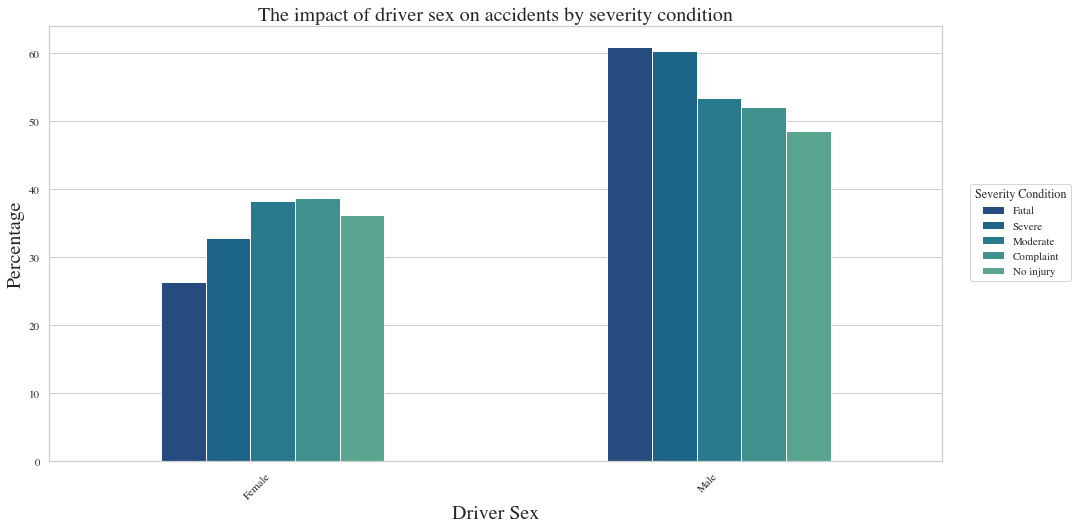

In [338]:
driver_sex = {'F': 'Female', 'M': 'Male'}
feature_contribution_for_all_severities(driver_sex, 'DR_SEX', 'Driver Sex')
plt.title('The impact of driver sex on accidents by severity condition', fontsize = 20)
plt.savefig('The impact of driver sex on accidents by severity condition.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

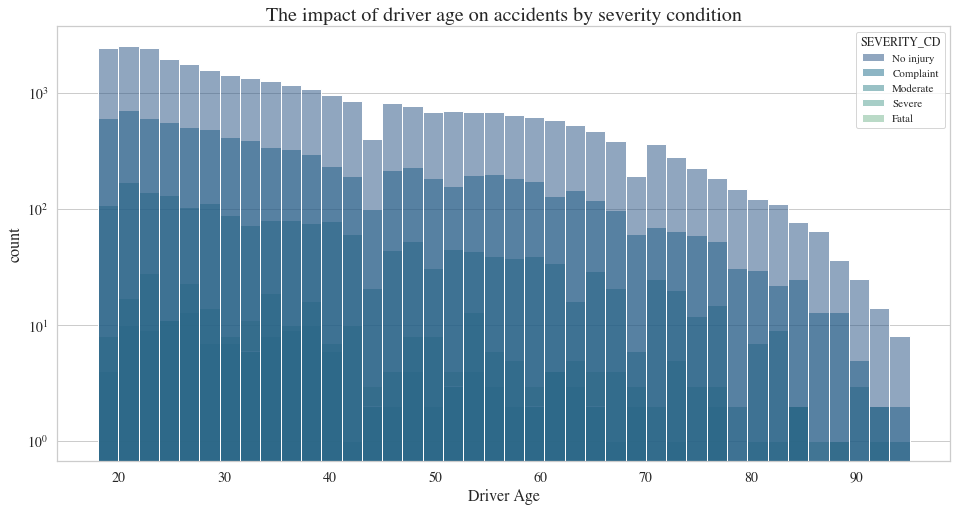

In [339]:
font = {'family': 'times'}
plt.rc('font', **font)

dr_age = br[(br['DR_AGE']>=18) & (br['DR_AGE']<=100)]

plt.figure(figsize = (16, 8))
sns.histplot(dr_age, x = 'DR_AGE', bins = 40, hue='SEVERITY_CD', alpha = 0.5, palette='crest_r')
plt.xlabel('Driver Age', fontsize = 16)
plt.ylabel('count', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.yscale('log')
plt.grid(axis='x')
plt.title('The impact of driver age on accidents by severity condition', fontsize = 20)
plt.savefig('The impact of driver age on accidents by severity condition.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

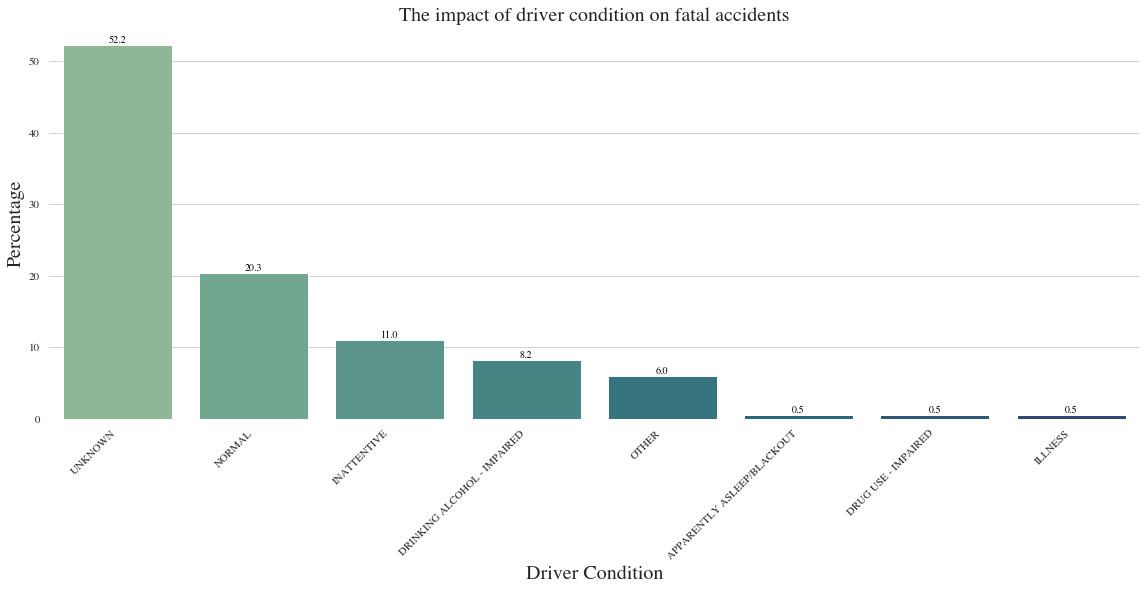

In [340]:
driver_condition = {
    'A': 'NORMAL',
    'B': 'INATTENTIVE',
    'C': 'DISTRACTED',
    'D': 'ILLNESS',
    'E': 'FATIGUED',
    'F': 'APPARENTLY ASLEEP/BLACKOUT',
    'G': 'DRINKING ALCOHOL - IMPAIRED',
    'H': 'DRINKING ALCOHOL - NOT IMPAIRED',
    'I': 'DRUG USE - IMPAIRED',
    'J': 'DRUG USE - NOT IMPAIRED',
    'K': 'PHYSICAL IMPAIRMENT (EYES, EAR, LIMB)',
    'Y': 'UNKNOWN',
    'Z': 'OTHER'
}
feature_contribution_for_particular_severity(driver_condition, 'DR_COND_CD', 'Driver Condition', 'Fatal')
plt.title('The impact of driver condition on fatal accidents', fontsize = 20)
plt.savefig('The impact of driver condition on fatal accidents.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

### Traffic condition:

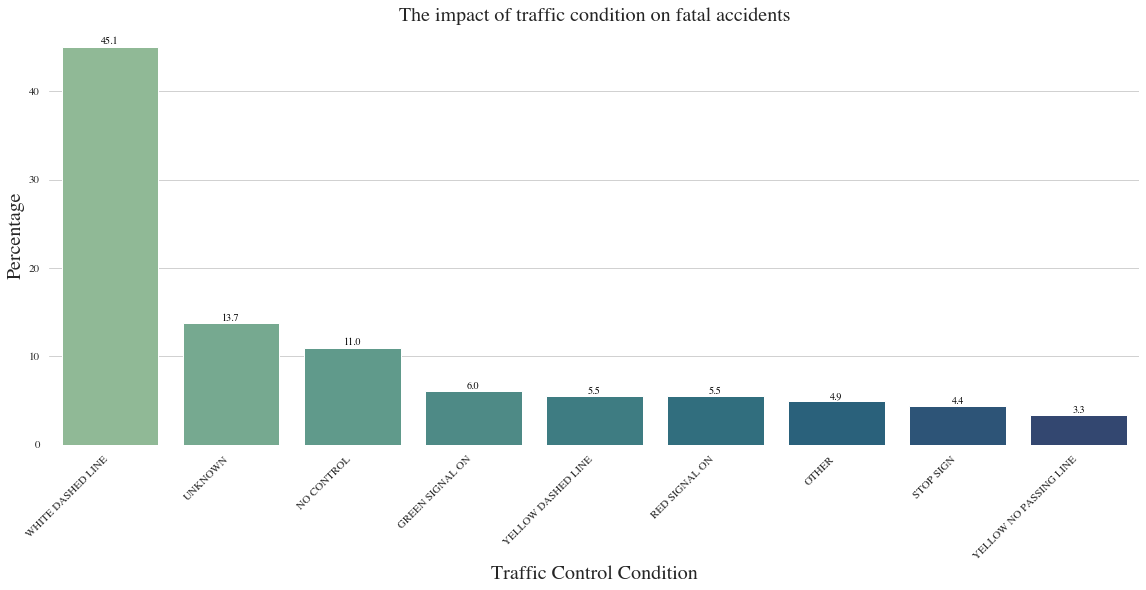

In [341]:
traffic_control_condition =  {
    'A': 'STOP SIGN',
    'B': 'YIELD SIGN',
    'C': 'RED SIGNAL ON',
    'D': 'YELLOW SIGNAL ON',
    'E': 'GREEN SIGNAL ON',
    'F': 'GREEN TURN ARROW ON',
    'G': 'RIGHT TURN ON RED',
    'H': 'LIGHT PHASE UNKNOWN',
    'I': 'FLASHING YELLOW',
    'J': 'FLASHING RED',
    'K': 'OFFICER, FLAGMAN',
    'L': 'RR CROSSING, SIGN',
    'M': 'RR CROSSING, SIGNAL',
    'N': 'RR CROSSING, NO CONTROL',
    'O': 'WARNING SIGN (SCHOOL, ETC.)',
    'P': 'SCHOOL FLASHING SPEED SIGN',
    'Q': 'YELLOW NO PASSING LINE',
    'R': 'WHITE DASHED LINE',
    'S': 'YELLOW DASHED LINE',
    'T': 'BIKE LANE',
    'U': 'CROSSWALK',
    'V': 'NO CONTROL',
    'Y': 'UNKNOWN',
    'Z': 'OTHER'
}
feature_contribution_for_particular_severity(traffic_control_condition, 'TRAFF_CNTL_CD', 'Traffic Control Condition', 'Fatal')
plt.title('The impact of traffic condition on fatal accidents', fontsize = 20)
plt.savefig('The impact of traffic  condition on fatal accidents.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

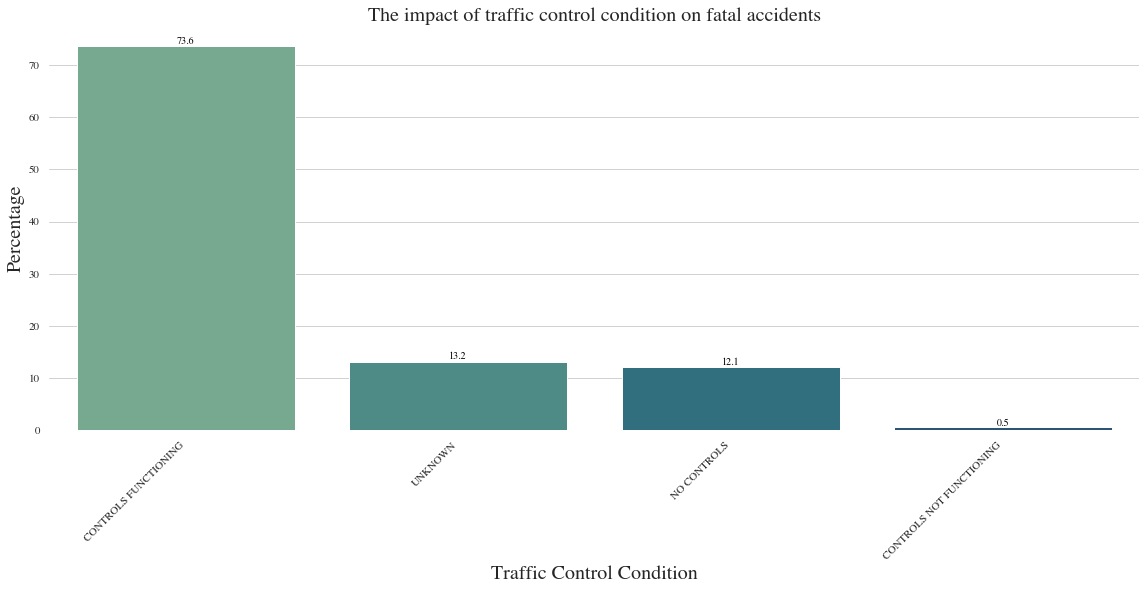

In [342]:
traffic_control_condition = {
    'A': 'CONTROLS FUNCTIONING',
    'B': 'CONTROLS NOT FUNCTIONING',
    'C': 'CONTROLS OBSCURED',
    'D': 'LANE MARKING UNCLEAR OR DEFECTIVE',
    'E': 'NO CONTROLS',
    'Y': 'UNKNOWN'
}
feature_contribution_for_particular_severity(traffic_control_condition, 'TRAFF_CNTL_COND_CD', 'Traffic Control Condition', 'Fatal')
plt.title('The impact of traffic control condition on fatal accidents', fontsize = 20)
plt.savefig('The impact of traffic control condition on fatal accidents.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

### Other variables (including environemntal factors):

<Figure size 1152x576 with 0 Axes>

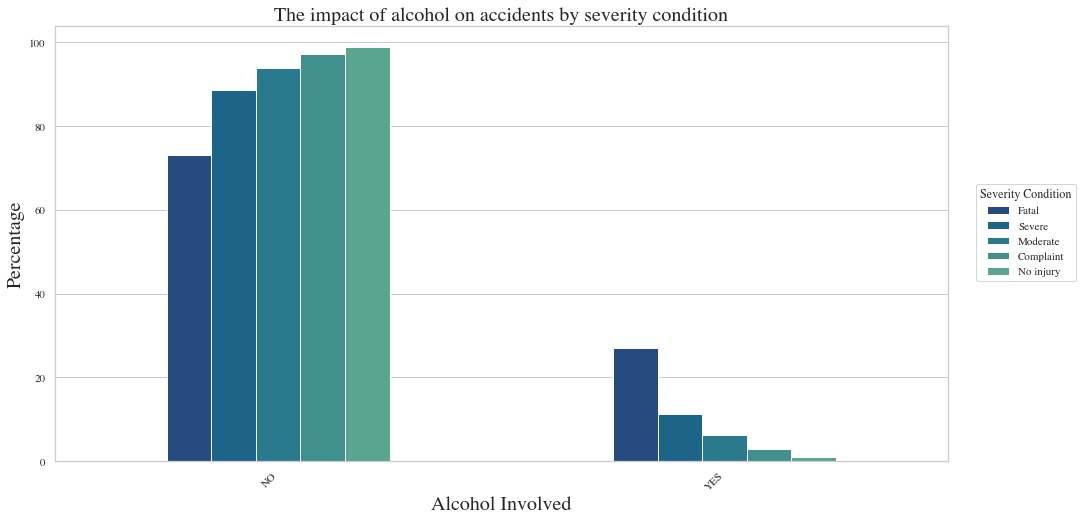

In [343]:
alcohol = {False: 'NO', True: 'YES'}
feature_contribution_for_all_severities(alcohol, 'ALCOHOL', 'Alcohol Involved')
plt.title('The impact of alcohol on accidents by severity condition', fontsize = 20)
plt.savefig('The impact of alcohol on accidents by severity conditions.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

<Figure size 1152x576 with 0 Axes>

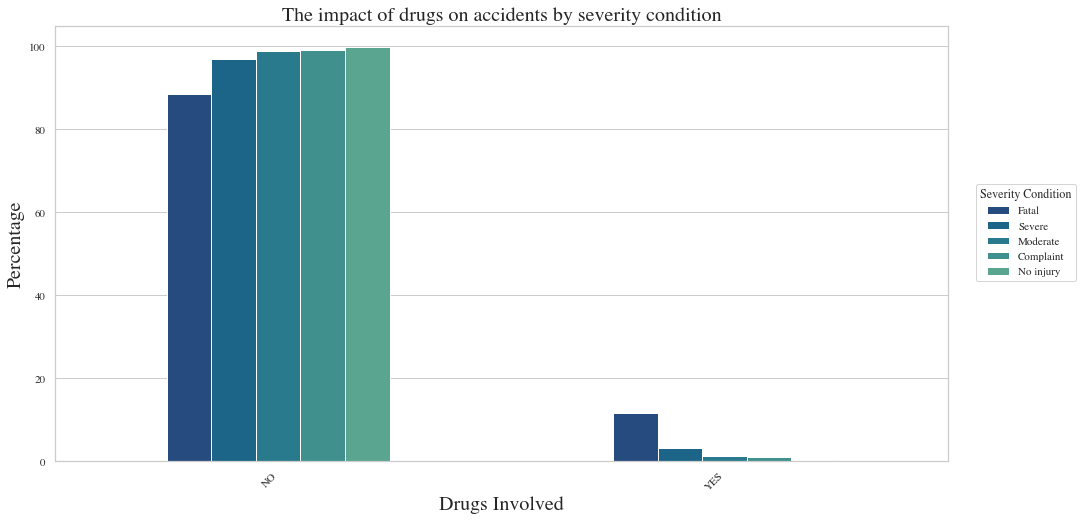

In [344]:
drugs = {False: 'NO', True: 'YES'}
feature_contribution_for_all_severities(drugs, 'DRUGS', 'Drugs Involved')
plt.title('The impact of drugs on accidents by severity condition', fontsize = 20)
plt.savefig('The impact of drugs on accidents by severity conditions.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

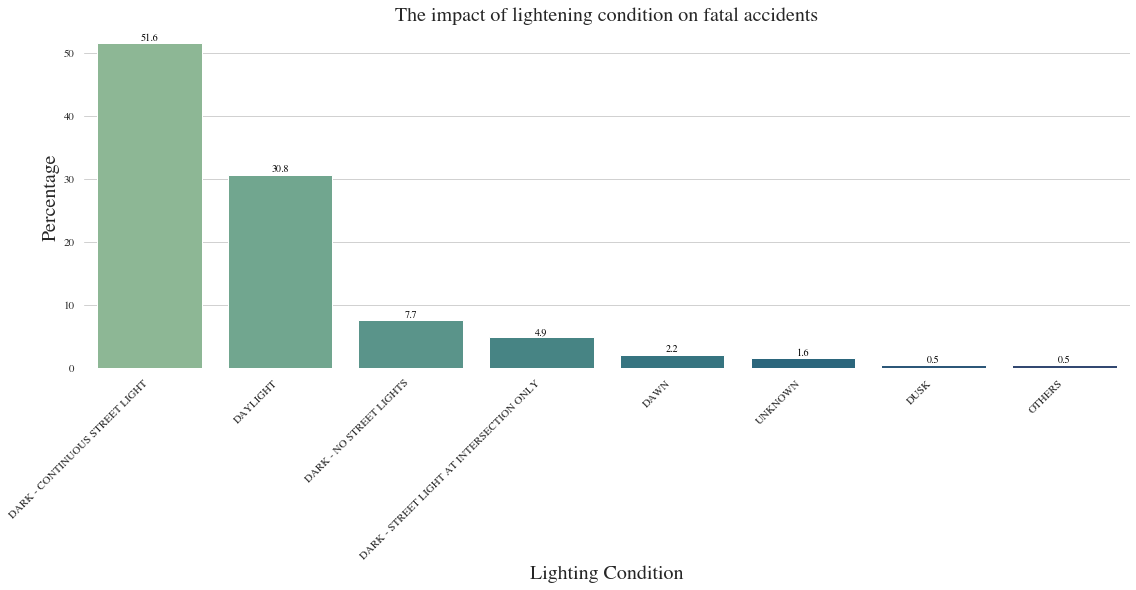

In [345]:
lighting_condition = {
    'A': 'DAYLIGHT',
    'B': 'DARK - NO STREET LIGHTS',
    'C': 'DARK - CONTINUOUS STREET LIGHT',
    'D': 'DARK - STREET LIGHT AT INTERSECTION ONLY',
    'E': 'DUSK',
    'F': 'DAWN',
    'Y': 'UNKNOWN',
    'Z': 'OTHERS'
}
feature_contribution_for_particular_severity(lighting_condition, 'LIGHTING_CD', 'Lighting Condition', 'Fatal')
plt.title('The impact of lightening condition on fatal accidents', fontsize = 20)
plt.savefig('The impact of lightening condition on fatal accidents.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

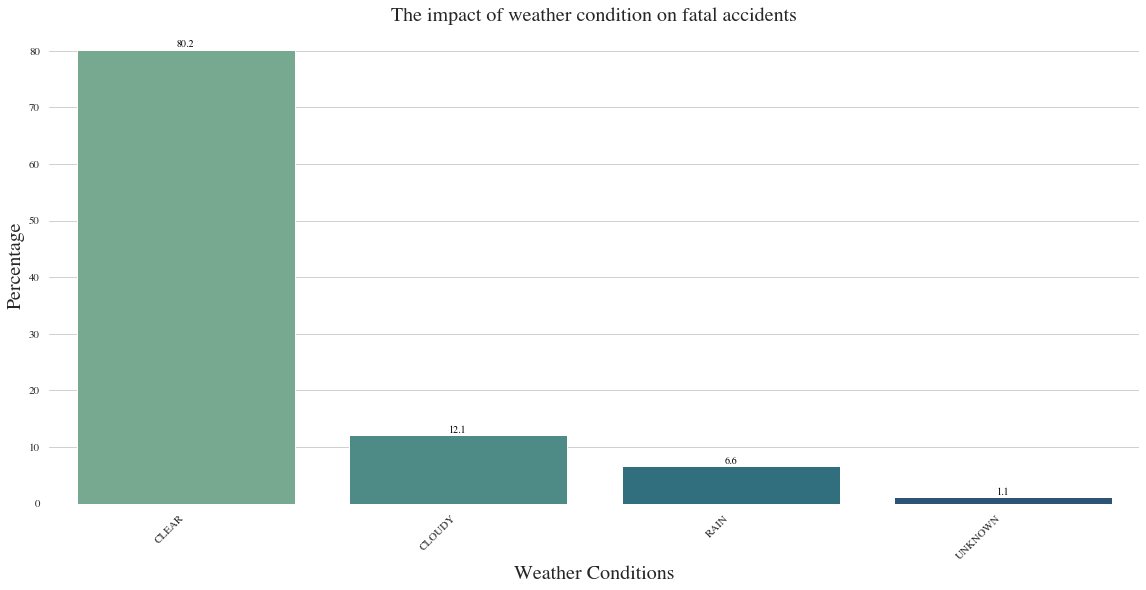

In [346]:
weather_condition = {
    'A': 'CLEAR',
    'B': 'CLOUDY',
    'C': 'RAIN',
    'D': 'FOG/SMOKE',
    'E': 'SLEET/HAIL',
    'F': 'SNOW',
    'G': 'SEVERE CROSSWIND',
    'H': 'BLOWING SAND, SOIL, DIRT, SNOW',
    'Y': 'UNKNOWN',
    'Z': 'OTHERS'
}
feature_contribution_for_particular_severity(weather_condition, 'WEATHER_CD', 'Weather Conditions', 'Fatal')
plt.title('The impact of weather condition on fatal accidents', fontsize = 20)
plt.savefig('The impact of weather condition on fatal accidents.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

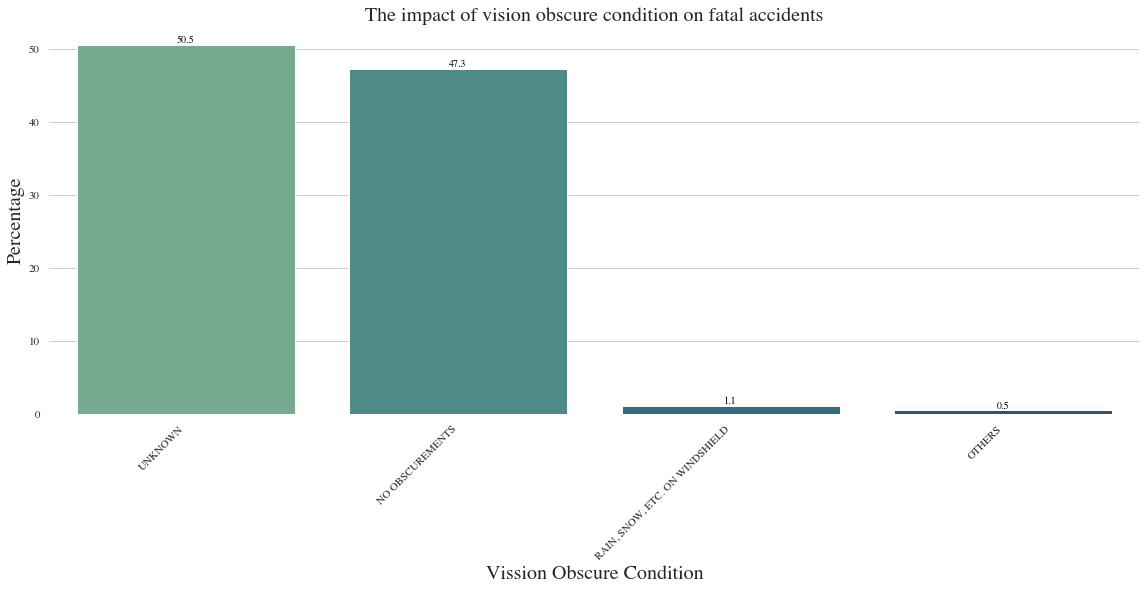

In [347]:
vision_obscure_condition = {
    'A': 'RAIN, SNOW, ETC. ON WINDSHIELD',
    'B': 'WINDSHIELD OTHERWISE OBSCURED',
    'C': 'VISION OBSCURED BY LOAD',
    'D': 'TREES, BUSHES, ETC.',
    'E': 'BUILDING',
    'F': 'EMBANKMENT',
    'G': 'SIGN BOARDS',
    'H': 'HILLCREST',
    'I': 'PARKED VEHICLES',
    'J': 'MOVING VEHICLES',
    'K': 'BLINDED BY HEADLIGHTS',
    'L': 'BLINDED BY SUNGLARE',
    'M': 'DISTRACTED BY NEON LIGHTS IN FIELD OF VIEW',
    'N': 'NO OBSCUREMENTS',
    'Y': 'UNKNOWN',
    'Z': 'OTHERS'
}
feature_contribution_for_particular_severity(vision_obscure_condition, 'VISION_OBSCURE_CD', 'Vission Obscure Condition', 'Fatal')
plt.title('The impact of vision obscure condition on fatal accidents', fontsize = 20)
plt.savefig('The impact of vision obscure condition on fatal accidents.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

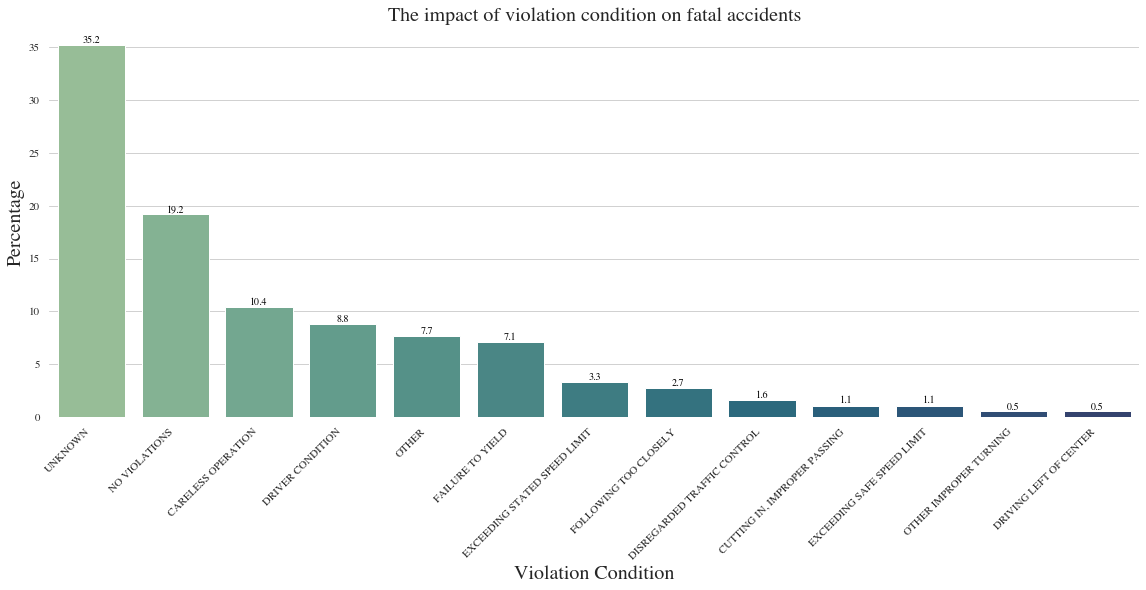

In [348]:
violation_condition = {
    'A': 'EXCEEDING STATED SPEED LIMIT',
    'B': 'EXCEEDING SAFE SPEED LIMIT',
    'C': 'FAILURE TO YIELD',
    'D': 'FOLLOWING TOO CLOSELY',
    'E': 'DRIVING LEFT OF CENTER',
    'F': 'CUTTING IN, IMPROPER PASSING',
    'G': 'FAILURE TO SIGNAL',
    'H': 'MADE WIDE RIGHT TURN',
    'I': 'CUT CORNER ON LEFT TURN',
    'J': 'TURNED FROM WRONG LANE',
    'K': 'OTHER IMPROPER TURNING',
    'L': 'DISREGARDED TRAFFIC CONTROL',
    'M': 'IMPROPER STARTING',
    'N': 'IMPROPER PARKING',
    'O': 'FAILED TO SET OUT FLAGS, FLARES',
    'P': 'FAILED TO DIM HEADLIGHTS',
    'Q': 'VEHICLE CONDITION',
    'R': 'DRIVER CONDITION',
    'S': 'CARELESS OPERATION',
    'T': 'IMPROPER BACKING',
    'U': 'NO VIOLATIONS',
    'Y': 'UNKNOWN',
    'Z': 'OTHER'
}
feature_contribution_for_particular_severity(violation_condition, 'VIOLATIONS_CD', 'Violation Condition', 'Fatal')
plt.title('The impact of violation condition on fatal accidents', fontsize = 20)
plt.savefig('The impact of violation condition on fatal accidents.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

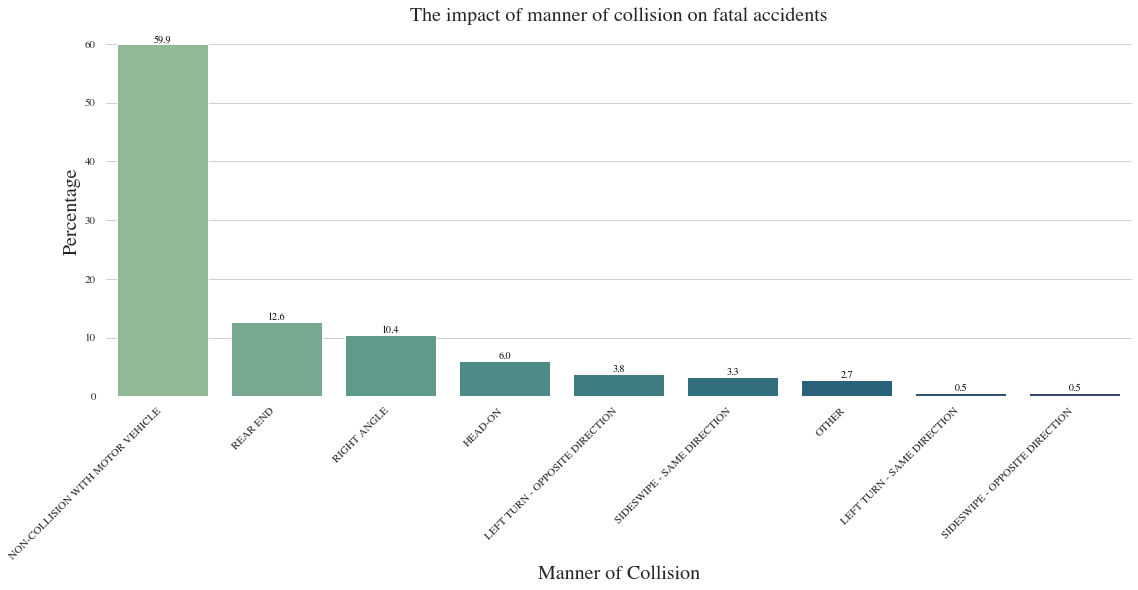

In [349]:
manner_of_collision = {
    'A': 'NON-COLLISION WITH MOTOR VEHICLE',
    'B': 'REAR END',
    'C': 'HEAD-ON',
    'D': 'RIGHT ANGLE',
    'E': 'LEFT TURN - ANGLE',
    'F': 'LEFT TURN - OPPOSITE DIRECTION',
    'G': 'LEFT TURN - SAME DIRECTION',
    'H': 'RIGHT TURN - SAME DIRECTION',
    'I': 'RIGHT TURN - OPPOSITE DIRECTION',
    'J': 'SIDESWIPE - SAME DIRECTION',
    'K': 'SIDESWIPE - OPPOSITE DIRECTION',
    'Z': 'OTHER'
}
feature_contribution_for_particular_severity(manner_of_collision, 'MAN_COLL_CD', 'Manner of Collision', 'Fatal')
plt.title('The impact of manner of collision on fatal accidents', fontsize = 20)
plt.savefig('The impact of manner of collision on fatal accidents.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

<Figure size 1152x576 with 0 Axes>

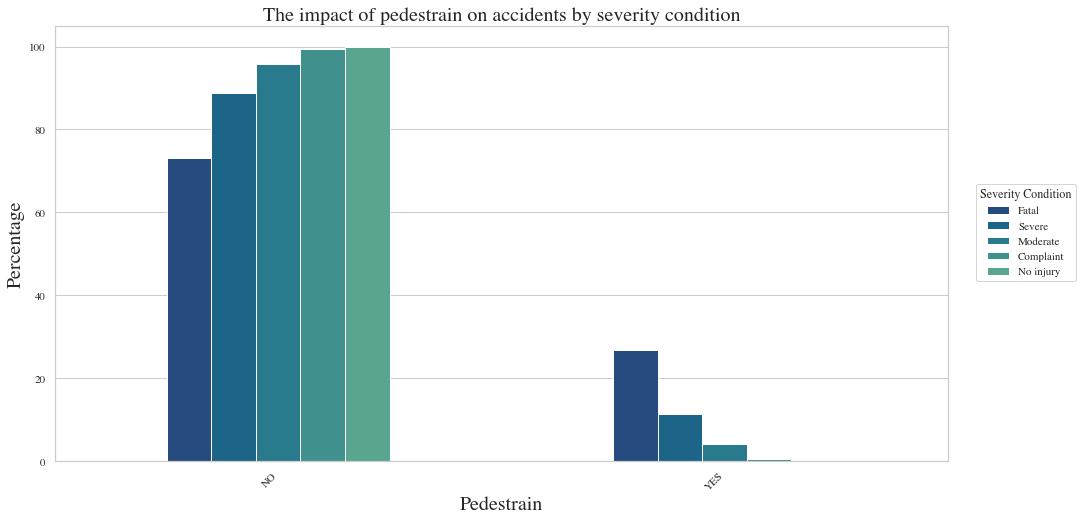

In [350]:
pedestrain =  {False:'NO', True: 'YES'}
feature_contribution_for_all_severities(pedestrain, 'PEDESTRIAN', 'Pedestrain')
plt.title('The impact of pedestrain on accidents by severity condition', fontsize = 20)
plt.savefig('The impact of pedestrain on accidents by severity condition.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

## Correlation between features:

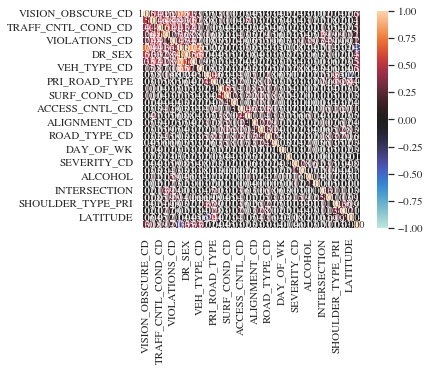

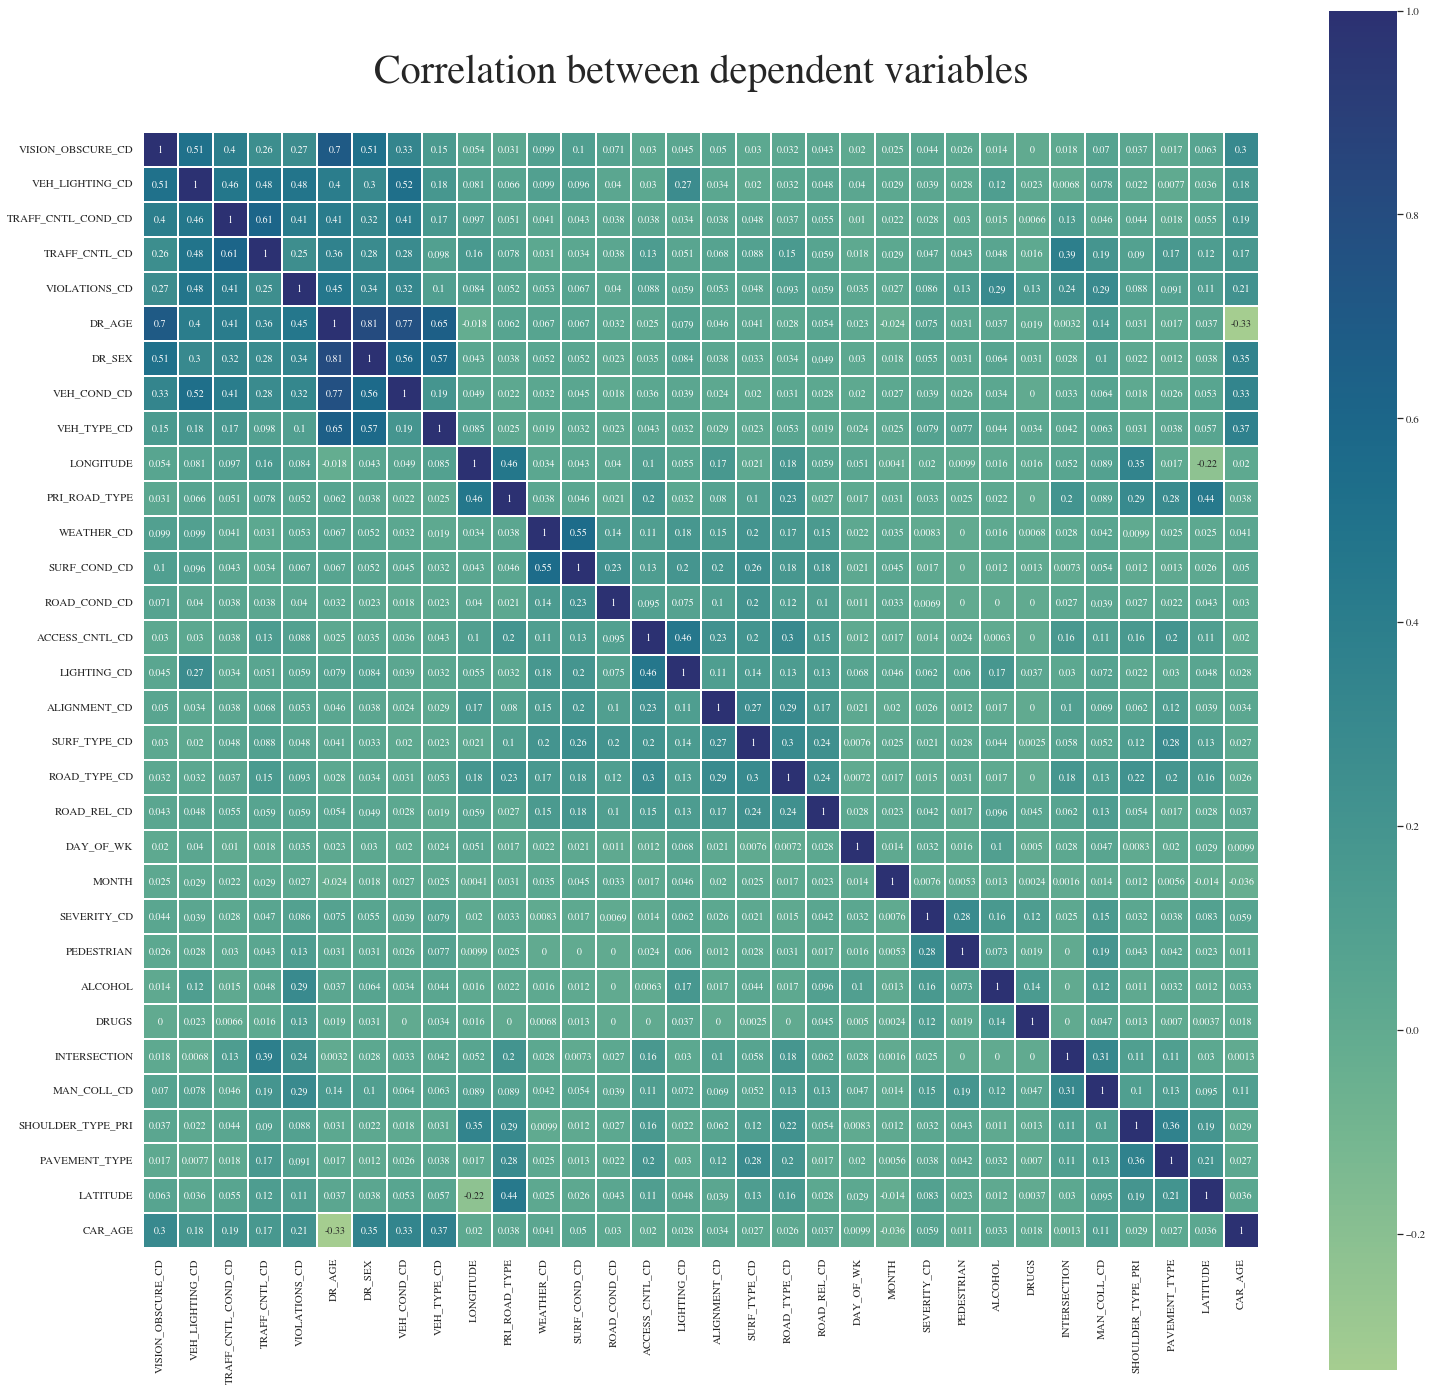

In [351]:
columns_ML = ['ROAD_COND_CD', 'ROAD_TYPE_CD', 'SURF_COND_CD', 'SURF_TYPE_CD', 'PAVEMENT_TYPE',
              'SHOULDER_TYPE_PRI', 'PRI_ROAD_TYPE', 'ROAD_REL_CD', 'ALIGNMENT_CD', 'ACCESS_CNTL_CD',
              'INTERSECTION', 'VEH_COND_CD', 'VEH_LIGHTING_CD', 'VEH_TYPE_CD', 'DR_SEX',
              'ALCOHOL', 'DRUGS', 'LIGHTING_CD', 'WEATHER_CD', 'PEDESTRIAN', 'TRAFF_CNTL_CD',
              'TRAFF_CNTL_COND_CD', 'VIOLATIONS_CD', 'VISION_OBSCURE_CD', 'MAN_COLL_CD', 'SEVERITY_CD',
              'DR_AGE', 'CAR_AGE', 'LATITUDE','LONGITUDE', 'DAY_OF_WK', 'MONTH'] 
correlation = associations(br[columns_ML], clustering = True, plot=False)
plt.figure(figsize=(25, 25))
sns.heatmap(correlation['corr'], annot=True, square=True, linewidths= 2, linecolor='white', cmap ='crest')
plt.title('Correlation between dependent variables', fontsize = 40, pad=50, loc='center')
plt.savefig('Correlation between dependent variables.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

## Joint features analysis:

In [352]:
def plot_helper_function_heatmap_joint_feature(joint_feature, figsize):
    
    '''This function get two features and plot the heat map by severity condition'''

    joint_feature = pd.crosstab(br['SEVERITY_CD'], joint_feature)
    joint_feature=joint_feature.div(joint_feature.sum(axis=0), axis=1)*100
    severity_order = ['Fatal', 'Severe', 'Moderate', 'Complaint', 'No injury']
    joint_feature = joint_feature.reindex(severity_order)
    plt.figure(figsize=figsize)
    sns.heatmap(joint_feature, annot = True, fmt='.1f', linewidths= 2, linecolor='white', cmap ='crest')

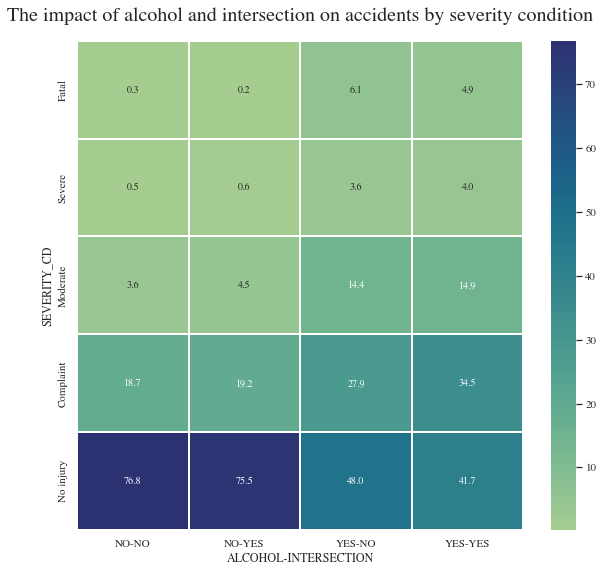

In [353]:
plot_helper_function_heatmap_joint_feature([br['ALCOHOL'], br['INTERSECTION']], (10, 9))
plt.title('The impact of alcohol and intersection on accidents by severity condition', fontsize = 20, pad = 20)
plt.savefig('The impact of alcohol and intersection on accidents by severity condition.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

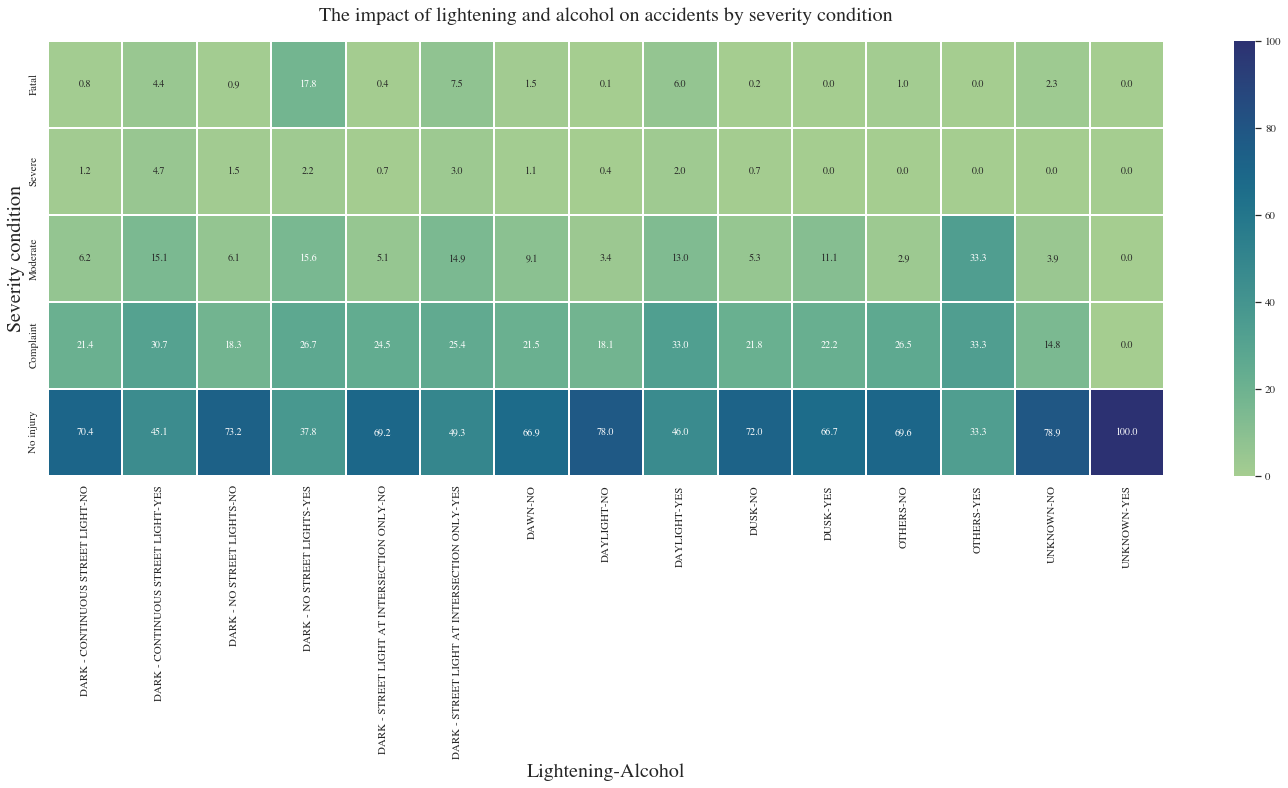

In [354]:
plot_helper_function_heatmap_joint_feature([br['LIGHTING_CD'], br['ALCOHOL']], (25, 8))
plt.xlabel('Lightening-Alcohol', fontsize = 20)
plt.ylabel('Severity condition', fontsize = 20)
plt.title('The impact of lightening and alcohol on accidents by severity condition', fontsize = 20, pad = 20)
plt.savefig('The impact of lightening and alcohol on accidents by severity condition.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

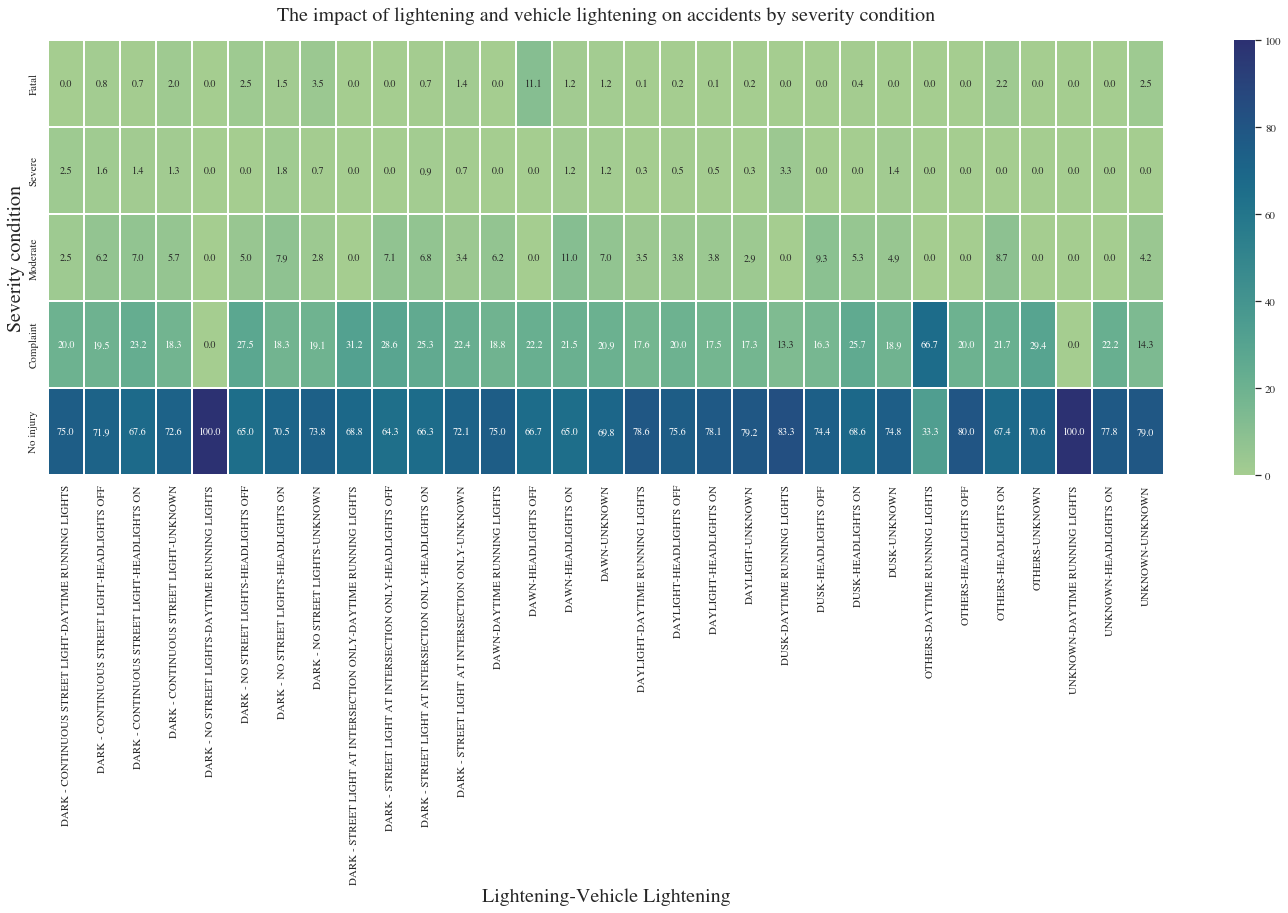

In [355]:
plot_helper_function_heatmap_joint_feature([br['LIGHTING_CD'], br['VEH_LIGHTING_CD']], (25, 8))
plt.xlabel('Lightening-Vehicle Lightening', fontsize = 20)
plt.ylabel('Severity condition', fontsize = 20)
plt.title('The impact of lightening and vehicle lightening on accidents by severity condition', fontsize = 20, pad = 20)
plt.savefig('The impact of lightening and vehicle lightening on accidents by severity condition.jpg', bbox_inches='tight', pad_inches=0.5, dpi=1000)

## Identifying key factors in fatal accident analysis through joint feature analysis:

### Two features:

In [275]:
value = []
feature_importance = []

features = ['ROAD_COND_CD', 'ROAD_TYPE_CD', 'SURF_COND_CD', 'SURF_TYPE_CD', 'PAVEMENT_TYPE', 
              'SHOULDER_TYPE_PRI', 'PRI_ROAD_TYPE', 'ROAD_REL_CD', 'ALIGNMENT_CD', 'ACCESS_CNTL_CD',
              'INTERSECTION', 'VEH_COND_CD', 'VEH_LIGHTING_CD' ,'VEH_TYPE_CD','DR_SEX',
              'ALCOHOL', 'DRUGS', 'LIGHTING_CD', 'WEATHER_CD', 'PEDESTRIAN', 'TRAFF_CNTL_CD', 
              'TRAFF_CNTL_COND_CD', 'VIOLATIONS_CD', 'VISION_OBSCURE_CD', 'MAN_COLL_CD']

features_copy = features.copy()
for feature_1 in features[::-1]:
    features_copy.pop()
    for feature_2 in features_copy:
        joint_feature = pd.crosstab(br['SEVERITY_CD'], [br[feature_1], br[feature_2]])
        joint_feature = joint_feature.div(joint_feature.sum(axis=0), axis=1) * 100
        severity_order = ['Fatal', 'Severe', 'Moderate', 'Complaint', 'No injury']
        joint_feature = joint_feature.reindex(severity_order)
        mean_value = joint_feature.loc['Fatal'].mean()
        value.append(mean_value)
        feature_importance.append((feature_1, feature_2))


In [276]:
two_feature_importance = pd.DataFrame({'Value': value, 'Feature': feature_importance})
two_feature_importance.sort_values(by='Value', ascending=False).head(20)

,Value,Feature
126,23.432255,"(PEDESTRIAN, DRUGS)"
127,16.908359,"(PEDESTRIAN, LIGHTING_CD)"
125,14.692861,"(PEDESTRIAN, ALCOHOL)"
113,14.156583,"(PEDESTRIAN, SURF_TYPE_CD)"
117,11.263635,"(PEDESTRIAN, ROAD_REL_CD)"
115,10.358382,"(PEDESTRIAN, SHOULDER_TYPE_PRI)"
124,10.339823,"(PEDESTRIAN, DR_SEX)"
114,10.028845,"(PEDESTRIAN, PAVEMENT_TYPE)"
177,9.620575,"(DRUGS, VEH_TYPE_CD)"
120,9.589212,"(PEDESTRIAN, INTERSECTION)"


### Three features:

In [278]:
value = []
feature_importance = []

features = ['ROAD_COND_CD', 'ROAD_TYPE_CD', 'SURF_COND_CD', 'SURF_TYPE_CD', 'PAVEMENT_TYPE', 
              'SHOULDER_TYPE_PRI', 'PRI_ROAD_TYPE', 'ROAD_REL_CD', 'ALIGNMENT_CD', 'ACCESS_CNTL_CD',
              'INTERSECTION', 'VEH_COND_CD', 'VEH_LIGHTING_CD' ,'VEH_TYPE_CD','DR_SEX',
              'ALCOHOL', 'DRUGS', 'LIGHTING_CD', 'WEATHER_CD', 'PEDESTRIAN', 'TRAFF_CNTL_CD', 
              'TRAFF_CNTL_COND_CD', 'VIOLATIONS_CD', 'VISION_OBSCURE_CD', 'MAN_COLL_CD']

features_copy = features.copy()
for feature_1 in features[::-1]:
    features_copy.pop()
    features_copy_copy = features_copy.copy()
    for feature_2 in features_copy[::-1]:
        features_copy_copy.pop()
        for feature_3 in features_copy_copy:
            joint_feature = pd.crosstab(br['SEVERITY_CD'], [br[feature_1], br[feature_2], br[feature_3]])
            joint_feature = joint_feature.div(joint_feature.sum(axis=0), axis=1) * 100
            severity_order = ['Fatal', 'Severe', 'Moderate', 'Complaint', 'No injury']
            joint_feature = joint_feature.reindex(severity_order)
            mean_value = joint_feature.loc['Fatal'].mean()
            value.append(mean_value)
            feature_importance.append((feature_1, feature_2, feature_3))


In [279]:
three_feature_importance = pd.DataFrame({'Value': value, 'Feature': feature_importance})
three_feature_importance.sort_values(by='Value', ascending=False).head(10)

,Value,Feature
1209,29.029991,"(PEDESTRIAN, DRUGS, DR_SEX)"
1205,25.298625,"(PEDESTRIAN, DRUGS, INTERSECTION)"
1198,22.645818,"(PEDESTRIAN, DRUGS, SURF_TYPE_CD)"
1207,20.968394,"(PEDESTRIAN, DRUGS, VEH_LIGHTING_CD)"
1210,20.592206,"(PEDESTRIAN, DRUGS, ALCOHOL)"
1194,20.465711,"(PEDESTRIAN, LIGHTING_CD, DRUGS)"
1199,20.337539,"(PEDESTRIAN, DRUGS, PAVEMENT_TYPE)"
1200,19.665821,"(PEDESTRIAN, DRUGS, SHOULDER_TYPE_PRI)"
1197,17.259722,"(PEDESTRIAN, DRUGS, SURF_COND_CD)"
1225,17.211330,"(PEDESTRIAN, ALCOHOL, DR_SEX)"


### Four features:

In [282]:
value = []
feature_importance = []

features = ['ROAD_COND_CD', 'ROAD_TYPE_CD', 'SURF_COND_CD', 'SURF_TYPE_CD', 'PAVEMENT_TYPE', 
              'SHOULDER_TYPE_PRI', 'PRI_ROAD_TYPE', 'ROAD_REL_CD', 'ALIGNMENT_CD', 'ACCESS_CNTL_CD',
              'INTERSECTION', 'VEH_COND_CD', 'VEH_LIGHTING_CD' ,'VEH_TYPE_CD','DR_SEX',
              'ALCOHOL', 'DRUGS', 'LIGHTING_CD', 'WEATHER_CD', 'PEDESTRIAN', 'TRAFF_CNTL_CD', 
              'TRAFF_CNTL_COND_CD', 'VIOLATIONS_CD', 'VISION_OBSCURE_CD', 'MAN_COLL_CD']

features_copy = features.copy()
for feature_1 in features[::-1]:
    features_copy.pop()
    features_copy_copy = features_copy.copy()
    for feature_2 in features_copy[::-1]:
        features_copy_copy.pop()
        features_copy_copy_copy = features_copy_copy.copy()
        for feature_3 in features_copy_copy[::-1]:
            features_copy_copy_copy.pop()
            for feature_4 in features_copy_copy_copy:
                joint_feature = pd.crosstab(br['SEVERITY_CD'], [br[feature_1], br[feature_2], br[feature_3], br[feature_4]])
                joint_feature = joint_feature.div(joint_feature.sum(axis=0), axis=1) * 100
                severity_order = ['Fatal', 'Severe', 'Moderate', 'Complaint', 'No injury']
                joint_feature = joint_feature.reindex(severity_order)
                mean_value = joint_feature.loc['Fatal'].mean()
                value.append(mean_value)
                feature_importance.append((feature_1, feature_2, feature_3, feature_4))


In [284]:
four_feature_importance = pd.DataFrame({'Value': value, 'Feature': feature_importance})
four_feature_importance.sort_values(by='Value', ascending=False).head(10)

,Value,Feature
8108,25.649428,"(PEDESTRIAN, DRUGS, ALCOHOL, DR_SEX)"
8119,24.064532,"(PEDESTRIAN, DRUGS, DR_SEX, INTERSECTION)"
8104,21.664574,"(PEDESTRIAN, DRUGS, ALCOHOL, INTERSECTION)"
8163,20.920071,"(PEDESTRIAN, DRUGS, INTERSECTION, PAVEMENT_TYPE)"
8112,20.549870,"(PEDESTRIAN, DRUGS, DR_SEX, SURF_TYPE_CD)"
8114,20.333522,"(PEDESTRIAN, DRUGS, DR_SEX, SHOULDER_TYPE_PRI)"
8203,19.552708,"(PEDESTRIAN, DRUGS, SHOULDER_TYPE_PRI, PAVEMEN..."
8113,19.373036,"(PEDESTRIAN, DRUGS, DR_SEX, PAVEMENT_TYPE)"
7972,19.172203,"(PEDESTRIAN, LIGHTING_CD, DRUGS, DR_SEX)"
8097,19.145801,"(PEDESTRIAN, DRUGS, ALCOHOL, SURF_TYPE_CD)"


In [283]:
br.to_csv('crash_severity.csv', index = False)